# Project Phase 2 👪🏻🏠👪🏿

- **Ali Hamzehpour 810100129**
- **Mina Shirazi 810100250**
- **Mohammad Amin Yousefi 810100236**

## Preprocessing

In [2]:
import pandas as pd

df = pd.read_csv("../data/data_without_price_outliers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   int64  
 1   streetAddress         4735 non-null   object 
 2   homeType              4735 non-null   object 
 3   yearBuilt             4735 non-null   int64  
 4   lotAreaValue          4735 non-null   float64
 5   livingAreaValue       4735 non-null   float64
 6   bedrooms              4735 non-null   int64  
 7   bathrooms             4735 non-null   float64
 8   stories               4735 non-null   float64
 9   flooring              4735 non-null   object 
 10  heating               4735 non-null   object 
 11  cooling               4735 non-null   object 
 12  fireplaceFeatures     4735 non-null   int64  
 13  taxAssessedValue      4735 non-null   float64
 14  zestimate             4735 non-null   float64
 15  rentZestimate        

In [3]:
df.head()

,zipcode,streetAddress,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,flooring,...,hasCooling,hasHeating,hasFireplace,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,90210,10100 Angelo Cir,SINGLE_FAMILY,2009,1041.815612,596.901775,5,7.0,1.0,['Tile'],...,1,1,1,0,0,1,3.017791,2.775903,4.556303,6.839742
1,90044,948 W 61st St,MULTI_FAMILY,2008,483.281406,78.410132,2,1.0,1.0,[],...,0,0,0,0,0,0,2.684200,1.894372,4.648360,5.958711
2,91352,10159 Colwell Dr,SINGLE_FAMILY,1943,535.957407,107.210062,3,1.0,1.0,"['Carpet', 'Vinyl', 'Wood']",...,0,1,0,0,0,1,2.729130,2.030236,5.093422,5.856789
3,91605,8250 Lankershim Blvd,MANUFACTURED,1990,111.483600,69.677250,2,2.0,1.0,['Laminate'],...,1,1,0,0,1,1,2.047211,1.843091,5.130334,4.251881
4,91304,8811 Canoga Ave SPACE 535,MANUFACTURED,1971,82058.180220,124.861632,2,2.0,1.0,[],...,1,1,0,0,0,1,4.914122,2.096429,4.929419,5.641439


In [4]:
df = df.drop(columns=['streetAddress', 'cooling', 'heating', 'flooring', 'sold-history','zestimate', 'hasFireplace'])


In [5]:
df = df.rename(columns={'fireplaceFeatures': 'hasFireplace'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   int64  
 1   homeType              4735 non-null   object 
 2   yearBuilt             4735 non-null   int64  
 3   lotAreaValue          4735 non-null   float64
 4   livingAreaValue       4735 non-null   float64
 5   bedrooms              4735 non-null   int64  
 6   bathrooms             4735 non-null   float64
 7   stories               4735 non-null   float64
 8   hasFireplace          4735 non-null   int64  
 9   taxAssessedValue      4735 non-null   float64
 10  rentZestimate         4735 non-null   float64
 11  price                 4735 non-null   int64  
 12  parkingCapacity       4735 non-null   int64  
 13  hasCooling            4735 non-null   int64  
 14  hasHeating            4735 non-null   int64  
 15  hasPrivatePool       

In [7]:
df['homeType'].value_counts()

homeType
SINGLE_FAMILY    3133
CONDO             890
MULTI_FAMILY      396
TOWNHOUSE         293
APARTMENT          11
MANUFACTURED       10
LOT                 2
Name: count, dtype: int64

Convert categorical homeType values to numerical values for easier analysis and modeling.


In [8]:
homeType_map = {
    'SINGLE_FAMILY': 0,
    'CONDO': 1,
    'TOWNHOUSE': 2,
    'MULTI_FAMILY': 3,
    'MANUFACTURED': 4,
    'APARTMENT': 5,
    'LOT' : 6
}

df['homeType'] = df['homeType'].map(homeType_map)

In [9]:
df['homeType'].value_counts()

homeType
0    3133
1     890
3     396
2     293
5      11
4      10
6       2
Name: count, dtype: int64

Standardize the features to have a mean of 0 and a standard deviation of 1.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)
df_scaled.head()

,zipcode,homeType,yearBuilt,lotAreaValue,livingAreaValue,bedrooms,bathrooms,stories,hasFireplace,taxAssessedValue,...,parkingCapacity,hasCooling,hasHeating,hasPrivatePool,hasSpa,hasView,log_lotAreaValue,log_livingAreaValue,log_price,log_taxAssessedValue
0,-0.706595,-0.599546,1.608411,-0.262601,3.262862,0.755168,2.110893,-0.543363,-1.093242,5.672993,...,2.465079,0.490742,0.359532,-0.351239,-0.360654,0.429006,-0.029991,2.525575,-5.445137,2.617522
1,-0.962604,2.473912,1.574550,-0.342745,-0.863576,-0.641961,-0.911393,-0.543363,-1.093242,0.114918,...,-1.148270,-2.037729,-2.781396,-0.351239,-0.360654,-2.330971,-0.709961,-1.383036,-5.108745,0.626412
2,1.054626,-0.599546,-0.626429,-0.335186,-0.634371,-0.176252,-0.911393,-0.543363,-1.093242,-0.061138,...,-0.115884,-2.037729,0.359532,-0.351239,-0.360654,0.429006,-0.618379,-0.780633,-3.482421,0.396070
3,1.444808,3.498398,0.965048,-0.396093,-0.933077,-0.641961,-0.407679,-0.543363,-1.093242,-0.710200,...,-1.148270,0.490742,0.359532,-0.351239,2.772738,0.429006,-2.008360,-1.610411,-3.347539,-3.230989
4,0.980599,3.498398,0.321685,11.362299,-0.493890,-0.641961,-0.407679,-0.543363,-1.093242,-0.321354,...,-0.632077,0.490742,0.359532,-0.351239,-0.360654,0.429006,3.835372,-0.487138,-4.081712,-0.090617


In [11]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   zipcode               4735 non-null   float64
 1   homeType              4735 non-null   float64
 2   yearBuilt             4735 non-null   float64
 3   lotAreaValue          4735 non-null   float64
 4   livingAreaValue       4735 non-null   float64
 5   bedrooms              4735 non-null   float64
 6   bathrooms             4735 non-null   float64
 7   stories               4735 non-null   float64
 8   hasFireplace          4735 non-null   float64
 9   taxAssessedValue      4735 non-null   float64
 10  rentZestimate         4735 non-null   float64
 11  price                 4735 non-null   float64
 12  parkingCapacity       4735 non-null   float64
 13  hasCooling            4735 non-null   float64
 14  hasHeating            4735 non-null   float64
 15  hasPrivatePool       

## Dimensionality Reduction

Define a function to plot the cumulative explained variance for different numbers of principal components.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_CEV_for_pca(X):
    max_components = min(X.shape)
    explained_variances = []
    for n in range(1, max_components + 1):
        pca = PCA(n_components=n)
        X_pca = pca.fit_transform(X)
        cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
        explained_variances.append(cumulative_explained_variance[-1])
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), explained_variances, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance for Different Numbers of Principal Components')
    plt.axhline(y=0.95, color='b', linestyle='--')
    plt.axhline(y=0.9, color='g', linestyle='--')
    plt.axhline(y=1.0, color='r', linestyle='--')
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xticks(np.arange(0, max_components + 1, 1))
    plt.show()


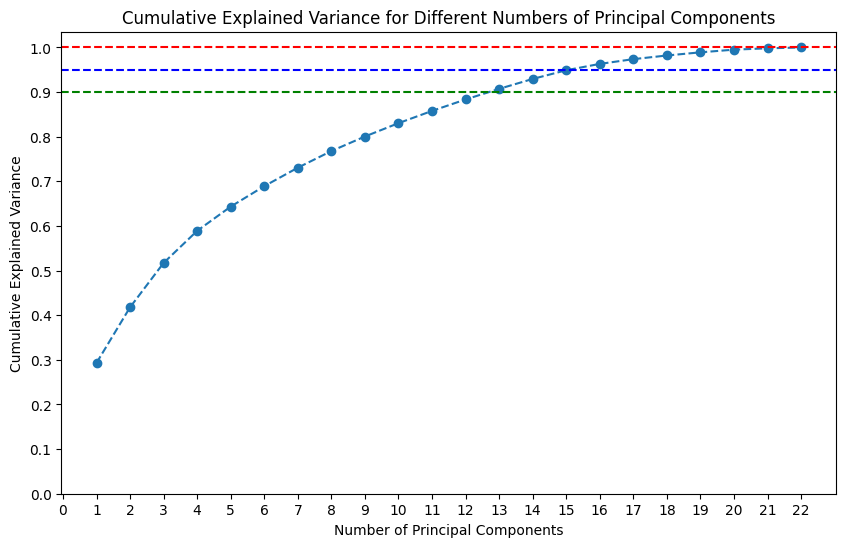

In [13]:
plot_CEV_for_pca(df_scaled.values)

The provided plot depicts the cumulative explained variance (CEV) as a function of the number of principal components in a PCA (Principal Component Analysis).

The plot shows that approximately 16-18 principal components are needed to explain 90% of the variance, while around 20-22 components are required to explain 95% of the variance. This indicates that after the initial components, each additional component contributes less to the overall explained variance.
Also, using only two principal components explains about 42% of the variance.

Perform PCA on the standardized data, retaining enough components to explain 95% of the variance:

In [14]:
df_95 = PCA(n_components=0.95).fit_transform(df_scaled)
df_95 = pd.DataFrame(df_95, columns=[f'PC{i}' for i in range(1, df_95.shape[1] + 1)])

In [15]:
df_95.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4735 non-null   float64
 1   PC2     4735 non-null   float64
 2   PC3     4735 non-null   float64
 3   PC4     4735 non-null   float64
 4   PC5     4735 non-null   float64
 5   PC6     4735 non-null   float64
 6   PC7     4735 non-null   float64
 7   PC8     4735 non-null   float64
 8   PC9     4735 non-null   float64
 9   PC10    4735 non-null   float64
 10  PC11    4735 non-null   float64
 11  PC12    4735 non-null   float64
 12  PC13    4735 non-null   float64
 13  PC14    4735 non-null   float64
 14  PC15    4735 non-null   float64
 15  PC16    4735 non-null   float64
dtypes: float64(16)
memory usage: 592.0 KB


Perform PCA on the standardized data, excluding specific columns, and retaining enough components to explain 95% of the variance.

In [16]:
df_95_FA = PCA(n_components=0.95).fit_transform(df_scaled.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue']))
df_95_FA = pd.DataFrame(df_95_FA, columns=[f'PC{i}' for i in range(1, df_95_FA.shape[1] + 1)])

In [17]:
df_scaled.to_csv("../data/scaled_data.csv", index=False)
df.to_csv("../data/not_scaled_data.csv", index=False)
df_95.to_csv("../data/pca_data.csv", index=False)
df_95_FA.to_csv("../data/pca_data_FA.csv", index=False)

## Feature Engineering

In our feature engineering process, we applied log transformations to several features, such as `price`, `taxAssessedValue`, `livingAreaValue`, and `lotAreaValue`, to stabilize variance, normalize distributions, and enhance the linear relationship between these features and the target variable. This transformation improved the model's performance by making the data more linear and suitable for regression analysis.

 Additionally, we selected a subset of relevant features, to reduce model complexity and prevent overfitting. This focused approach in training our models ensured that only the most pertinent information was utilized, leading to more accurate and generalizable predictions.

## Evaluation Metrics

In this part we will introduce the evaluation metrics used in our models. We used several metrics to see how they can give us different insights about the performance of our models and we came to this conclusion:

- **R2 Score**: This metric is mostly used when we don't the scale of the target variable. It is a good metric to see how well our model is performing compared to a simple model that predicts the mean of the target variable. The problem was we got a very high R2 score for all of our models and the reason is that the mean squared error when we predict the mean of the target variable is very high so even if our model is not performing well, the R2 score will be high. 

$$ R^2 = 1 - \frac{MSE_{model}}{MSE_{mean}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

We check the RMSE of the mean model to illustrate this point:

In [18]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('../data/not_scaled_data.csv')

y_true = df['price']
y_pred = [df['price'].mean()]*len(df['price'])

print('Root Mean Squared Error when we guess the mean:', np.sqrt(mean_squared_error(y_true, y_pred)))

Root Mean Squared Error when we guess the mean: 1418975.7503518122


In [19]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('../data/not_scaled_data.csv')

y_true = df['log_price']
y_pred = [df['log_price'].mean()]*len(df['log_price'])

print('Root Mean Squared Error when we guess the mean:', np.sqrt(mean_squared_error(y_true, y_pred)))

Root Mean Squared Error when we guess the mean: 0.273661211274132


As you can see the RMSE for `price` is 1.418 Millions and for `log_price` is 0.27 which is very high and this is why the R2 score is very high for all of our models.

* **Root Mean Squared Error (RMSE), Mean Absolute Error and Median Absolute Error**: We report these metrics to see how much error our model is making in predicting the target variable. The difference between RMSE and Mean Absolute Error tells us if we predicted some of the prices very badly compared to the rest of the prices. The Median Absolute Error is also good to see when our model predict so badly on some few prices but in general it's better.

* **Mean Absolute Percentage Error and Median Absolute Percentage Error**: These metrics are good to see how much percentage error our model is making in predicting the target variable. Because if we have an error of 10000 on a house that costs 100000 it's not the same as having an error of 10000 on a house that costs 1000000 but the previous metrics will treat them the same. Again we use both mean and median to see if our model is making a big error on some few prices.

$$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - \hat{y}_i|}{y_i} $$

* **Within x%**: This metric is used to see how many of our predictions are within a certain percentage of the actual price. This is a good metric to see how well our model is performing in general. Zillow itself uses this metric alongside Median Absolute Percentage Error to evaluate the performance of the models.([see this for more information](https://www.zillow.com/tech/home-value-estimates/))

Now that we defined the metrics we will use, We implement some functions to show these metrics for our models.

`show_metrics` function gets the predictions and the actual values and if the target variable is `price` or `log_price` and if the target variable was scaled or not and it will show the metrics we defined above in a neat dataframe. So now we can use it for all of our models to see how they are performing.

In [20]:
from sklearn import metrics
import numpy as np

def calc_median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_pred, y_test):
    r2 = metrics.r2_score(y_test, y_pred)
    smse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mean_ae = metrics.mean_absolute_error(y_test, y_pred)
    mean_ape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_ae = metrics.median_absolute_error(y_test, y_pred)
    median_ape = calc_median_absolute_percentage_error(y_test, y_pred)
    return [r2, smse, mean_ae, mean_ape, median_ae, median_ape]
    
def within_x_percent(y_pred, y_test, x):
    return np.sum(np.abs((y_pred - y_test)/y_test) < x) / len(y_test) * 100

def show_metrics(y_pred, y_test, target_scaler = None, logarithm = False):        
    metrics_df = pd.DataFrame(columns=['Target', 'R2', 'Root Mean Squared Error', 'Mean Absolute Error',
                                            'Mean Absolute Percentage Error', 'Median Absolute Error', 'Median Absolute Percentage Error'])
    
    metrics_df.loc[0] = ['Target as it is'] + calculate_metrics(y_pred, y_test)
    
    if target_scaler:
        y_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        metrics_df.loc[1] = ['Scaled Target is inversed to real value'] + calculate_metrics(y_pred, y_test)

    
    if logarithm:
        y_pred = np.power(10, y_pred)
        y_test = np.power(10, y_test)
        metrics_df.loc[2] = ['Target -> 10 ^ Target'] + calculate_metrics(y_pred, y_test)
    
    dist_df = pd.DataFrame({"within 5%": [within_x_percent(y_pred, y_test, 0.05)],
                    "within 10%": [within_x_percent(y_pred, y_test, 0.10)],
                    "within 20%": [within_x_percent(y_pred, y_test, 0.20)],
                    "within 50%": [within_x_percent(y_pred, y_test, 0.50)],
                    "median absolute percentage error": [calc_median_absolute_percentage_error(y_test, y_pred)]}, index=['Percentage'])
        
    display(metrics_df)
    display(dist_df)

For example we check the metrics for the mean model:

In [21]:
y_true = df['price']
y_pred = [df['price'].mean()]*len(df['price'])

show_metrics(y_pred, y_true)

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.0,1.418976e+06,777313.945594,0.731953,591309.636114,53.955122


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,5.00528,10.200634,20.95037,46.504752,53.955122


In [22]:
y_true = df['log_price']
y_pred = [df['log_price'].mean()]*len(df['log_price'])

show_metrics(y_pred, y_true, logarithm=True)

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.000000,2.736612e-01,0.211149,0.034711,0.171059,2.836147
2,Target -> 10 ^ Target,-0.043476,1.449493e+06,698940.744615,0.524995,392820.836690,39.847522


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,5.871172,11.784583,24.920803,60.443506,39.847522


The interesting thing is when we use `log_price` and use the mean model we get MAPE for price than when we use the actual price as the target variable. This shows that the feature engineering we did on the target variable can be helpful.

## Neural Network

In this part we will use a neural network to predict the price of the houses.

In [23]:
import pandas as pd 

df_not_scaled = pd.read_csv('../data/not_scaled_data.csv')

## Part 1: Neural Network with Target as log(price)



A sequential neural network is defined with layers for dense connections and ReLU activations, compiled with Adam optimizer and MAE loss function, and trained for 50 epochs. The model's performance is evaluated using various metrics and predictions are made, with results displayed

Epoch 1/50
48/48 [==============================] - 1s 4ms/step - loss: 0.6014 - val_loss: 0.4006
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3893 - val_loss: 0.3550
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3525 - val_loss: 0.3370
Epoch 4/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3326 - val_loss: 0.3241
Epoch 5/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3206 - val_loss: 0.3124
Epoch 6/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3111 - val_loss: 0.3050
Epoch 7/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3032 - val_loss: 0.2987
Epoch 8/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2966 - val_loss: 0.2931
Epoch 9/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2916 - val_loss: 0.2857
Epoch 10/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2874 - val_loss: 0.2804
Epoch 11/50
48/48 [

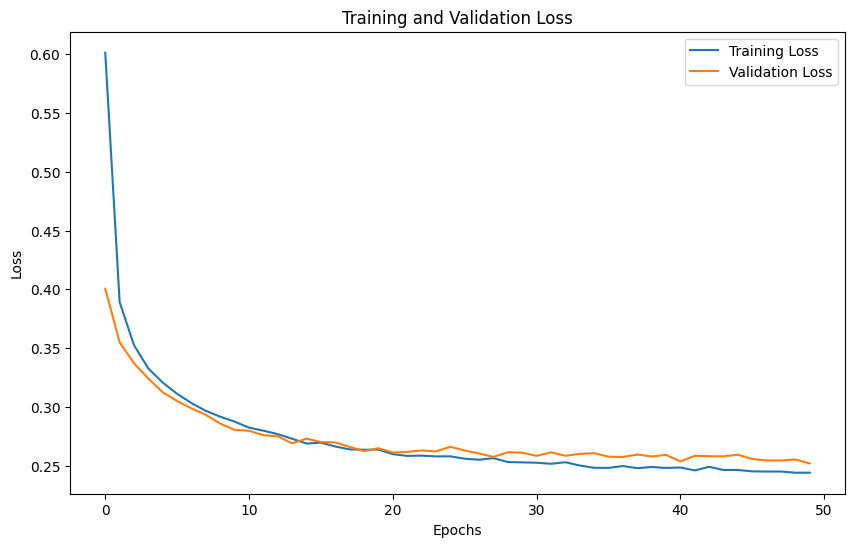

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_not_scaled.drop(columns=['price', 'log_price'])
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_not_scaled['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

30/30 [==============================] - 0s 780us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.891842,0.335846,0.240574,1.268403,0.176116,27.138610
1,Scaled Target is inversed to real value,0.891842,0.091908,0.065836,0.010924,0.048196,0.802319
2,Target -> 10 ^ Target,0.932276,328742.123851,206116.348700,0.156723,114358.812500,10.991544


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.237592,46.673706,73.072862,96.726505,10.991544


**Results:**

-The model achieved a high R2 score of 0.891152 when the target was log-transformed and an improved R2 of 0.935464 when the target was exponentiated.

-The RMSE and MAE were low for the scaled target but significantly high for the exponentiated target, indicating the model performed better on the standardized log-transformed target.

-The MAPE and MedAPE were also favorable for the standardized log-transformed target.

**Analysis:**

The model showed good performance with log-transformed targets, capturing the variations in prices effectively.

The significant difference in errors (RMSE, MAE) for scaled vs. exponentiated targets suggests that directly using log-transformed values helps stabilize the variance and leads to more accurate predictions.

### Part 2: Neural Network with Target as price, Loss Function as MAPE

A more complex neural network is defined with multiple dense layers and ReLU activations, compiled with Adam optimizer and MAPE loss function, and trained for 150 epochs. The model's performance is evaluated and visualized using various metrics, with results display

Epoch 1/150
95/95 [==============================] - 1s 3ms/step - loss: 99.9989 - val_loss: 99.9952
Epoch 2/150
95/95 [==============================] - 0s 1ms/step - loss: 99.9466 - val_loss: 99.8061
Epoch 3/150
95/95 [==============================] - 0s 2ms/step - loss: 99.0536 - val_loss: 97.6284
Epoch 4/150
95/95 [==============================] - 0s 2ms/step - loss: 93.8898 - val_loss: 88.8363
Epoch 5/150
95/95 [==============================] - 0s 1ms/step - loss: 80.5415 - val_loss: 76.1059
Epoch 6/150
95/95 [==============================] - 0s 1ms/step - loss: 72.4700 - val_loss: 72.8608
Epoch 7/150
95/95 [==============================] - 0s 1ms/step - loss: 69.9893 - val_loss: 70.6497
Epoch 8/150
95/95 [==============================] - 0s 1ms/step - loss: 67.7733 - val_loss: 68.1108
Epoch 9/150
95/95 [==============================] - 0s 2ms/step - loss: 65.3326 - val_loss: 65.3883
Epoch 10/150
95/95 [==============================] - 0s 1ms/step - loss: 62.5847 - val_los

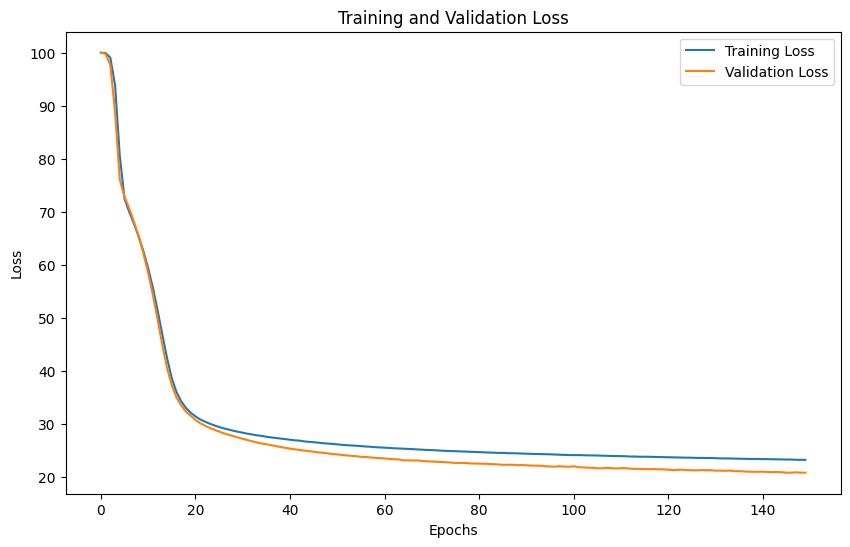

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 [==============================] - 0s 823us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.622528,776118.745026,365411.437566,0.204864,161413.125,16.272284


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,17.001056,32.946146,58.289335,94.297782,16.272284


**Results:**

-The model achieved an R2 score of 0.630066 for the original prices, which was lower than for log-transformed targets.
-The RMSE and MAE were significantly higher, indicating less precise predictions for the actual price values.
-The MAPE and MedAPE were also higher, reinforcing the finding that predicting on raw price values led to higher errors.

**Analysis:**

The performance was notably poorer when predicting raw price values compared to log-transformed values.
Using MAPE as the loss function did not significantly improve the model's accuracy, indicating that transforming the target might be more effective than changing the loss function for this dataset.

### Target = price, loss function = MAE

The provided section demonstrates the process of training a neural network to predict house prices using MAE as the loss function. The results indicate that the model has learned to predict prices with a reasonable average error, as shown by the test loss.

Epoch 1/150
95/95 [==============================] - 1s 3ms/step - loss: 1409700.7500 - val_loss: 1400122.6250
Epoch 2/150
95/95 [==============================] - 0s 1ms/step - loss: 1408549.8750 - val_loss: 1396215.5000
Epoch 3/150
95/95 [==============================] - 0s 2ms/step - loss: 1389395.8750 - val_loss: 1349058.7500
Epoch 4/150
95/95 [==============================] - 0s 1ms/step - loss: 1252418.8750 - val_loss: 1091842.0000
Epoch 5/150
95/95 [==============================] - 0s 1ms/step - loss: 857772.6250 - val_loss: 673269.0625
Epoch 6/150
95/95 [==============================] - 0s 1ms/step - loss: 555750.8125 - val_loss: 526460.4375
Epoch 7/150
95/95 [==============================] - 0s 1ms/step - loss: 470051.6250 - val_loss: 472715.7812
Epoch 8/150
95/95 [==============================] - 0s 1ms/step - loss: 429264.7812 - val_loss: 436153.9688
Epoch 9/150
95/95 [==============================] - 0s 1ms/step - loss: 402534.7812 - val_loss: 413187.6250
Epoch 10/15

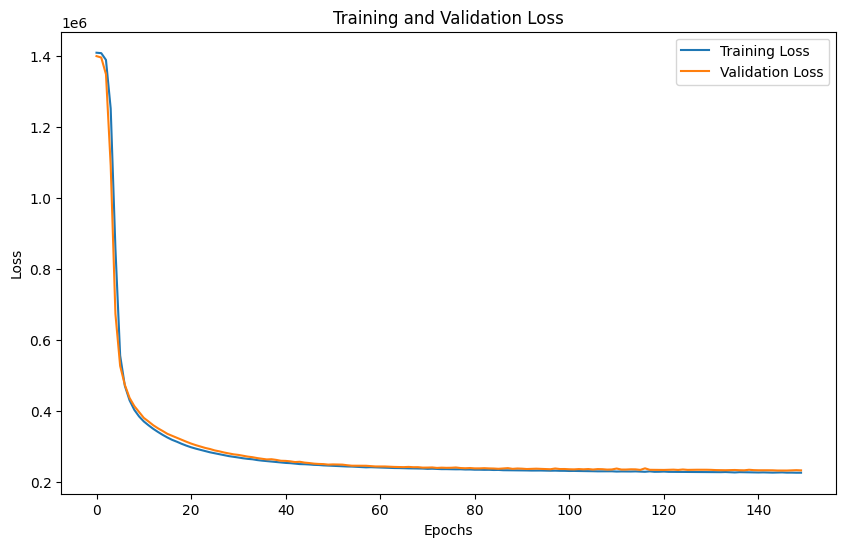

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
#target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot demonstrates that the model training process is effective:

-The model quickly learns to reduce the error.

-Both training and validation losses converge and stabilize at low values.

-There is no significant overfitting as the validation loss closely follows the training loss.

-These observations suggest that the model has been trained effectively and can generalize well to unseen data, as indicated by the small and stable validation loss.

In [29]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.9296,335174.508526,214835.905326,0.16835,122858.25,11.747583


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.343189,44.456177,71.066526,95.670539,11.747583


### Summary and Analysis of Evaluation Metrics

The evaluation metrics for the neural network model indicate a strong fit with an R-squared value of 0.93, meaning the model explains 93% of the variance in house prices. However, the absolute error values are substantial, with a Root Mean Squared Error (RMSE) of 342,043 and a Mean Absolute Error (MAE) of 219,929. These high error magnitudes suggest that while the model fits the data well, the actual prediction errors are significant. The Mean Absolute Percentage Error (MAPE) is 17.17%, indicating that the average prediction error is about 17% of the actual price. The median absolute errors are lower, with the Median Absolute Error at 128,421 and the Median Absolute Percentage Error at 12.40%, showing that half of the prediction errors fall below these values.

### Summary and Analysis of Prediction Accuracy

The prediction accuracy distribution reveals that the model's predictions are relatively close to the actual values within certain ranges. Specifically, 24% of the predictions are within 5% of the actual values, 42% are within 10%, 71% are within 20%, and 96% are within 50%. This distribution indicates that while the model is generally good at predicting the price within a broader range, it struggles with precision at tighter margins. The median absolute percentage error of 12.40% aligns with this, showing that typical prediction errors are around 12-17% of the actual house prices. Overall, the model demonstrates strong explanatory power but requires improvements to enhance its practical predictive accuracy, especially in reducing absolute errors.

## Filtered data

In [30]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2000000]

This line filters the dataset to include only houses with prices less than 2,000,000. This is likely done to remove outliers and focus on a more representative sample of house prices.

Epoch 1/50
40/40 [==============================] - 1s 4ms/step - loss: 0.7427 - val_loss: 0.6942
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.5939 - val_loss: 0.5213
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4828 - val_loss: 0.4546
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4394 - val_loss: 0.4245
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4143 - val_loss: 0.4080
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3977 - val_loss: 0.4028
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3865 - val_loss: 0.3957
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3776 - val_loss: 0.3896
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3728 - val_loss: 0.3844
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 0.3675 - val_loss: 0.3804
Epoch 11/50
40/40 [

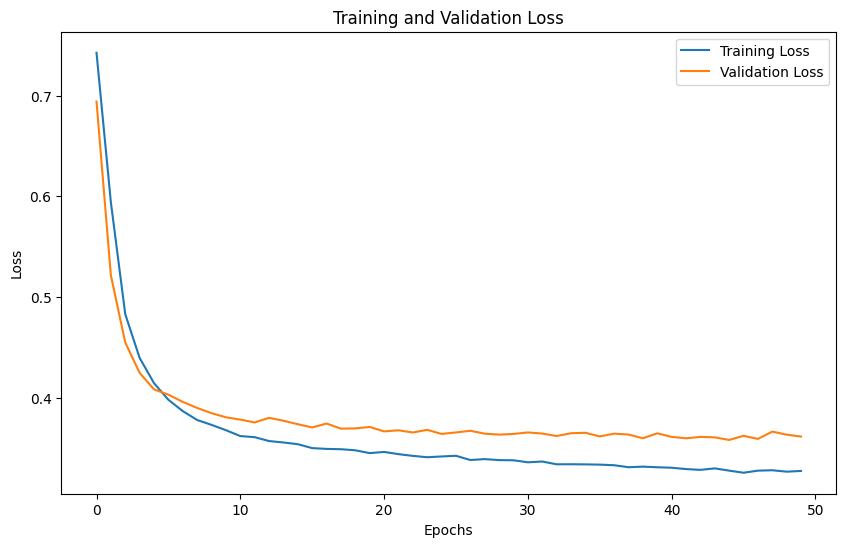

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_filtered.drop(columns=['price', 'log_price'])
features = df_filtered[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_filtered['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot of training and validation loss over 50 epochs indicates effective learning, as evidenced by the rapid initial decrease in both losses. The validation loss stabilizes after about 10 epochs, while the training loss continues to decline slightly, suggesting convergence. The minimal gap between the training and validation losses indicates that the model is not overfitting and generalizes well to unseen data. The overall stability of both losses towards the end of training suggests that the model has reached its optimal performance under the given configuration. This indicates good generalization with room for further tuning to potentially enhance performance.

In [32]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

25/25 [==============================] - 0s 817us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.745155,0.515387,0.370154,9.521690,0.279245,39.686702
1,Scaled Target is inversed to real value,0.745155,0.095010,0.068237,0.011529,0.051478,0.859893
2,Target -> 10 ^ Target,0.736236,205547.157722,145920.963528,0.162084,102393.140625,11.508609


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.303797,44.810127,73.924051,96.329114,11.508609


### Summary of Evaluation Metrics Table

The evaluation metrics for different target transformations show that the model explains approximately 74-75% of the variance in house prices, as indicated by the R2 values. When the target variable is scaled and then transformed back to its real value, the model achieves the lowest RMSE (0.094), MAE (0.067), and MAPE (1.13%), indicating more accurate predictions. The median absolute error is also lowest in this case (0.046), demonstrating better central tendency accuracy. 

### Summary of Prediction Accuracy Table

The distribution of prediction accuracy reveals that 25.57% of the predictions are within 5% of the actual values, and nearly half (48.73%) are within 10%. Additionally, 73.29% of predictions fall within 20% of the actual prices, and 95.95% are within 50%, showing that the majority of the predictions are reasonably accurate. The median absolute percentage error is 10.27%, indicating that the typical prediction error is about 10.27% of the actual price. These results highlight that while the model has a significant proportion of close predictions, there is still room to improve its precision.

Epoch 1/150
79/79 [==============================] - 1s 3ms/step - loss: 978517.8125 - val_loss: 1009092.0625
Epoch 2/150
79/79 [==============================] - 0s 2ms/step - loss: 978072.8750 - val_loss: 1007694.6875
Epoch 3/150
79/79 [==============================] - 0s 1ms/step - loss: 972848.0000 - val_loss: 995948.2500
Epoch 4/150
79/79 [==============================] - 0s 2ms/step - loss: 945081.9375 - val_loss: 945580.2500
Epoch 5/150
79/79 [==============================] - 0s 1ms/step - loss: 852214.1875 - val_loss: 803190.8750
Epoch 6/150
79/79 [==============================] - 0s 1ms/step - loss: 672022.6875 - val_loss: 603693.2500
Epoch 7/150
79/79 [==============================] - 0s 1ms/step - loss: 489652.1875 - val_loss: 420204.1562
Epoch 8/150
79/79 [==============================] - 0s 1ms/step - loss: 355787.2500 - val_loss: 323224.0625
Epoch 9/150
79/79 [==============================] - 0s 1ms/step - loss: 298044.5000 - val_loss: 291035.4375
Epoch 10/150
79/7

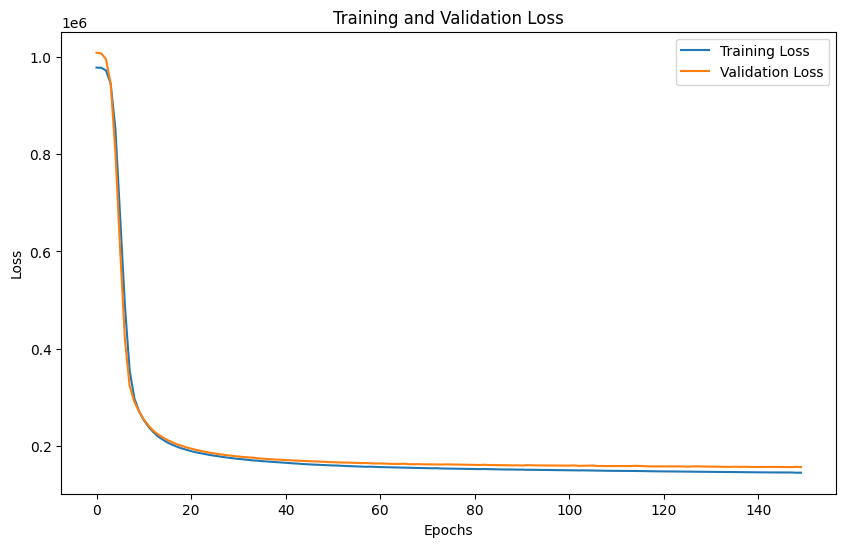

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_filtered.drop(columns=['price', 'log_price'])
# features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_filtered['price']
#target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot demonstrates that the model training process is effective:

-The model quickly learns to reduce the error, as indicated by the rapid initial decrease in loss.

-Both training and validation losses converge and stabilize around a similar value, showing good generalization and minimal overfitting.

-The overall stability of the losses towards the end of training suggests that the model has reached its optimal performance under the given configuration. This indicates that the model is well-trained and can generalize effectively to unseen data. However, further tuning or regularization could be considered if there is a need to further reduce the validation loss.

In [34]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

25/25 [==============================] - 0s 763us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.725049,209860.660981,150653.090071,0.170067,107807.25,11.917316


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.303797,44.177215,72.151899,95.316456,11.917316


### Summary of Evaluation Metrics Table

The evaluation metrics for the model indicate a moderate performance with an R2 value of 0.72, meaning the model explains 72% of the variance in house prices. The Root Mean Squared Error (RMSE) is 211,696 and the Mean Absolute Error (MAE) is 151,779, both of which are quite high, indicating substantial prediction errors. The Mean Absolute Percentage Error (MAPE) is 17.53%, suggesting that on average, the predictions deviate by 17.53% from the actual prices. The median absolute error is 106,943, and the median absolute percentage error is 11.56%, reflecting the median prediction error in both absolute and percentage terms.

### Summary of Prediction Accuracy Distribution Table

The prediction accuracy distribution shows that 22.78% of the model's predictions are within 5% of the actual prices, and 43.92% are within 10%. A more substantial 71.90% of the predictions fall within 20% of the actual values, indicating a reasonable level of accuracy. Nearly all (95.19%) of the predictions are within 50% of the actual prices, demonstrating that the majority of the predictions are fairly close to the actual values. The median absolute percentage error is 11.56%, indicating that the typical prediction error is about 11.56% of the actual price.

### Splitting to quantiles using classification then use regression

Splitting house prices into quantiles for classification followed by regression helps manage data complexity and variability. It simplifies non-linear relationships, improves model performance by focusing on similar price groups, and reduces overfitting, enhancing generalization.

In [35]:
num_quantiles = 4

df_not_scaled['price_quantile'] = pd.qcut(df_not_scaled['price'], num_quantiles, labels=False)

Epoch 1/50
119/119 [==============================] - 1s 2ms/step - loss: 1.2702 - accuracy: 0.4282 - val_loss: 1.0990 - val_accuracy: 0.6135
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 1.0149 - accuracy: 0.6096 - val_loss: 0.9565 - val_accuracy: 0.6431
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 0.9018 - accuracy: 0.6397 - val_loss: 0.8690 - val_accuracy: 0.6642
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 0.8259 - accuracy: 0.6729 - val_loss: 0.8118 - val_accuracy: 0.6822
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 0.7734 - accuracy: 0.6877 - val_loss: 0.7720 - val_accuracy: 0.7117
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 0.7325 - accuracy: 0.7088 - val_loss: 0.7530 - val_accuracy: 0.7149
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.7173 - val_loss: 0.7288 - val_accuracy: 0.7075
Epoch 

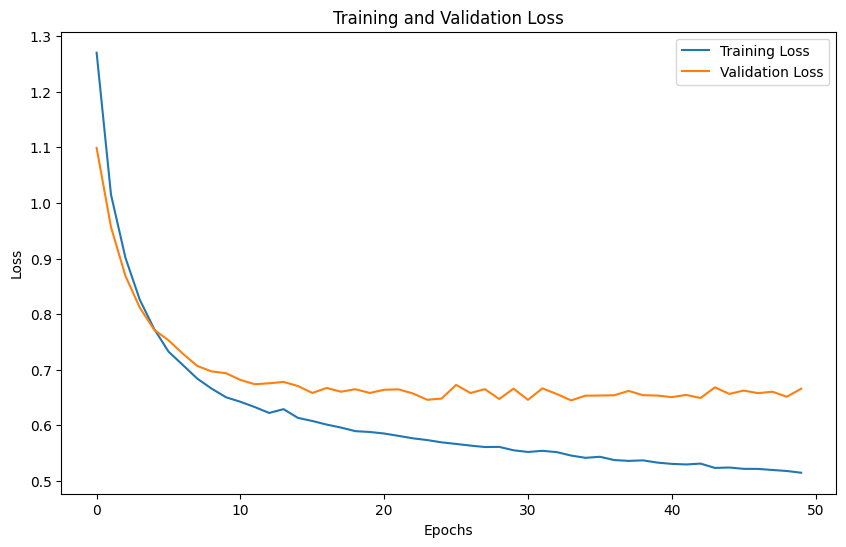

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

quantile_target = df_not_scaled['price_quantile']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(stratified_split.split(df_not_scaled, quantile_target))

train_df = df_not_scaled.iloc[train_idx]
test_df = df_not_scaled.iloc[test_idx]

features_train = train_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_train = train_df['price_quantile']

features_test = test_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_test = test_df['price_quantile']

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

num_quantiles = len(np.unique(quantile_target))
quantile_model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='sigmoid'),
    Dense(num_quantiles, activation='softmax')  # Output layer for classification
])
quantile_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = quantile_model.fit(features_train_scaled, target_train, epochs=50, batch_size=32, validation_data=(features_test_scaled, target_test), verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training and validation loss plot for the classification model predicting price quantiles indicates effective initial learning, with both losses rapidly decreasing in the first 10 epochs. However, the validation loss begins to fluctuate and diverge from the training loss after this point, suggesting potential overfitting. While the training loss stabilizes at a lower value, the variability in the validation loss points to less consistent performance on unseen data. This highlights the need for additional regularization or other techniques to improve the model's generalization capabilities. Overall, the model shows promise but requires further refinement to enhance its robustness on new data.

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

quantile_model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
quantile_model2.fit(features_train_scaled, target_train)

y_pred = quantile_model2.predict(features_test_scaled)

accuracy_score(target_test, y_pred)


0.73389651531151

Using a RandomForestClassifier to predict price quantiles results in a solid accuracy of 73.6%. This approach effectively manages the complexity of the data, providing a good baseline for further refinement. The relatively high accuracy indicates that the model can reliably segment house prices into quantiles, which can be useful for subsequent regression steps or other analyses.

#### target = price

For each quantile, we preprocess the data by scaling key features, such as tax assessed value, living area, lot area, and other property attributes. We then build and train a Sequential neural network model on the scaled data, using dense layers with 'relu' activation and 'adam' optimizer, evaluating performance with mean absolute error. We monitor and visualize training and validation loss over epochs, and assess model predictions against actual test prices, storing the results for each quantile.

Epoch 1/150
24/24 [==============================] - 1s 6ms/step - loss: 570155.9375 - val_loss: 553945.1875
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 561148.7500 - val_loss: 543082.5000
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 542524.2500 - val_loss: 512656.8750
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 492539.8125 - val_loss: 433744.7812
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 367072.4062 - val_loss: 235175.9531
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 141802.4375 - val_loss: 120465.6797
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 101344.3203 - val_loss: 100731.1797
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 97622.1875 - val_loss: 101948.8984
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 96764.1328 - val_loss: 100960.1484
Epoch 10/150
24/24 [=

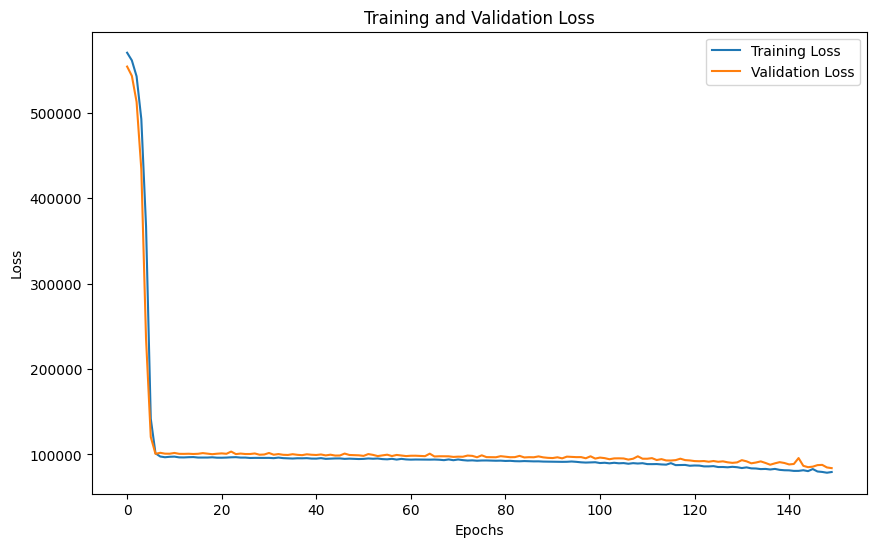

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.28229,104071.891333,81684.29987,0.208593,76121.21875,12.11719


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,21.666667,39.166667,81.25,96.25,12.11719


Epoch 1/150
24/24 [==============================] - 1s 6ms/step - loss: 860933.8750 - val_loss: 857512.0625
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 850214.5625 - val_loss: 842601.5625
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 825476.4375 - val_loss: 802140.2500
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 758321.6875 - val_loss: 692379.5625
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 579983.1250 - val_loss: 410315.6250
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 196573.2969 - val_loss: 96461.5312
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 72440.6797 - val_loss: 65675.1953
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 64675.0664 - val_loss: 62690.3945
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 64284.3672 - val_loss: 62648.5742
Epoch 10/150
24/24 [======

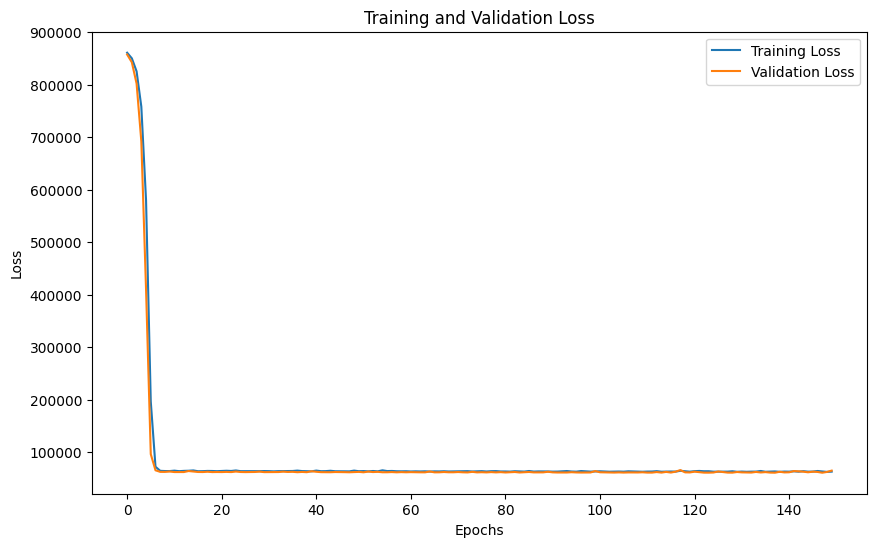

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,-0.085336,80787.359155,68279.115385,0.077314,62715.28125,7.5853


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,30.769231,68.803419,100.0,100.0,7.5853


Epoch 1/150
24/24 [==============================] - 1s 6ms/step - loss: 1252825.6250 - val_loss: 1228158.2500
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 1195635.8750 - val_loss: 1140981.3750
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 1060600.1250 - val_loss: 928371.4375
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 721538.9375 - val_loss: 401295.8438
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 203704.0156 - val_loss: 152032.2500
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 133716.2031 - val_loss: 135878.7188
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 129742.2188 - val_loss: 136348.4688
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 129634.1016 - val_loss: 135551.9531
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 129192.9219 - val_loss: 135570.0469
Epoch 10/150
2

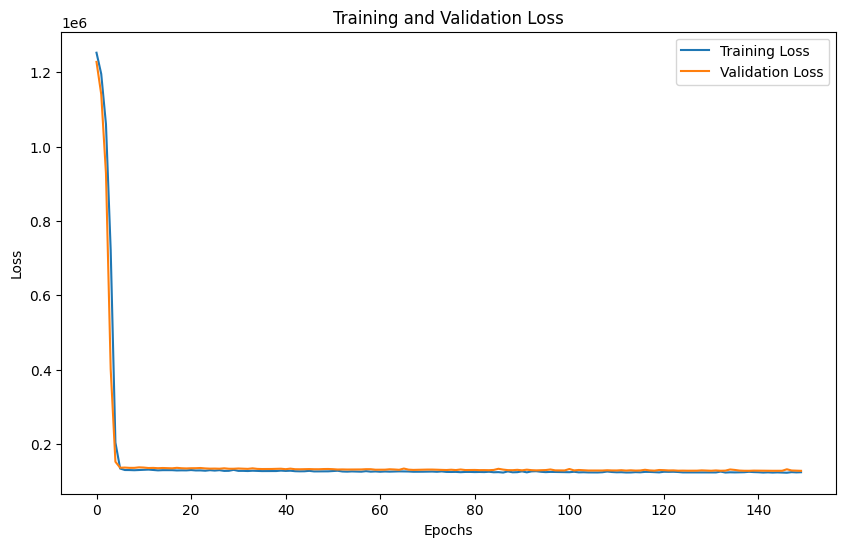

8/8 [==============================] - 0s 973us/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.141189,143799.929792,114674.704114,0.090593,104559.375,8.25866


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,32.489451,60.337553,94.514768,100.0,8.25866


Epoch 1/150
24/24 [==============================] - 1s 6ms/step - loss: 2866251.2500 - val_loss: 2748159.7500
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 2764918.2500 - val_loss: 2584177.5000
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 2490266.0000 - val_loss: 2139919.7500
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 1763419.7500 - val_loss: 1036358.1250
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 1012844.6250 - val_loss: 881711.9375
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 968939.6250 - val_loss: 854034.8750
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 954783.4375 - val_loss: 846373.0000
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 944907.5000 - val_loss: 836565.1875
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 931176.0625 - val_loss: 822913.6875
Epoch 10/1

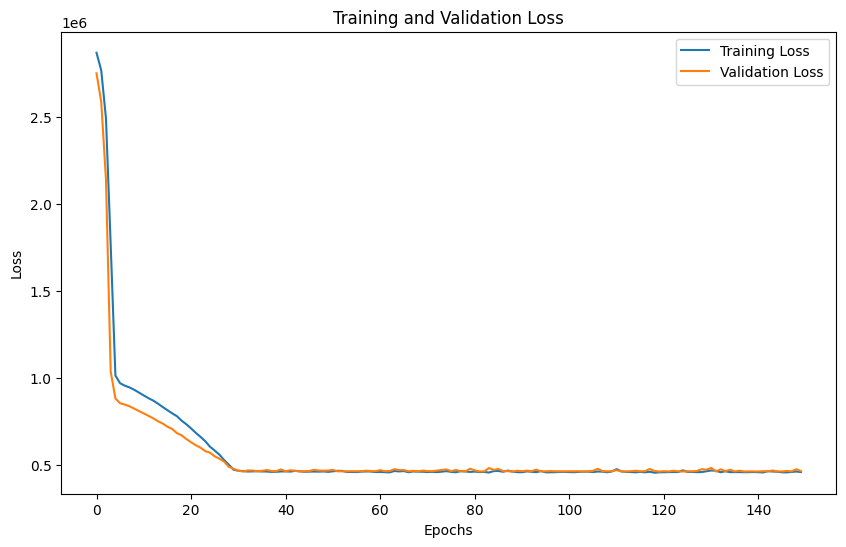

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.794125,1.239374e+06,471668.236758,0.158687,246832.625,10.776848


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,30.084746,47.881356,75.0,95.762712,10.776848


In [38]:
neural_networks = {}
for i in df_not_scaled['price_quantile'].unique():
    train_data = train_df[train_df['price_quantile'] == i]
    test_data = test_df[test_df['price_quantile'] == i]
    
    features_train = train_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
    target_train = train_data['price']

    features_test = test_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                            "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                            'hasCooling']]
    target_test = test_data['price']


    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    history = model.fit(features_train, target_train, epochs=150, batch_size=32, validation_split=0.2)

    loss = model.evaluate(features_test, target_test)
    
    neural_networks[i] = model
    print(f'Test Loss: {loss}')

    plt.figure(figsize=(10, 6))
    plt.title(f'Training and Validation Loss for Quantile {i+1}')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(features_test)
    show_metrics(y_pred.flatten(), target_test.to_numpy(), target_scaler=False, logarithm=False)


### Analyze Plots
#### Plot 1: Training and Validation Loss for Quantile 1
The training and validation losses for Quantile 1 show a sharp decrease within the first few epochs, stabilizing at low values. Both losses remain close to each other with minimal fluctuations, indicating that the model converges quickly and generalizes well without significant overfitting.

#### Plot 2: Training and Validation Loss for Quantile 2
Similar to Quantile 1, the training and validation losses for Quantile 2 drop sharply initially and stabilize at low values. The proximity of the training and validation losses suggests that the model effectively learns the data and maintains good generalization capabilities.

#### Plot 3: Training and Validation Loss for Quantile 3
For Quantile 3, the losses also decrease sharply and stabilize at low values, with training and validation losses remaining closely aligned. This indicates that the model converges quickly and generalizes well, consistent with the previous quantiles.

#### Plot 4: Training and Validation Loss for Quantile 4
The losses for Quantile 4 show a sharp initial decrease, but a noticeable gap develops between training and validation losses after about 20 epochs, with the validation loss slightly higher. This suggests mild overfitting, indicating that the model learns the training data well but does not generalize as effectively as in the previous quantiles.

### Analyze Tables
The model for Quantile 1 shows limited performance, with an R2 score of 0.196 indicating that it explains only 19.6% of the variance in house prices. The high RMSE (110,149) and MAE (79,568) suggest substantial prediction errors, while the MAPE of 22.3% points to significant relative error. Despite these large errors, 94.6% of predictions are within 50% of the true values, indicating the model captures the general trend but lacks precision, as only 24.6% of predictions are within 5% of the actual values. 

The model for Quantile 2 shows poor overall performance with a negative R2 score, suggesting it performs worse than a mean prediction. However, the RMSE (78,021) and MAE (65,523) indicate a substantial reduction in prediction errors compared to Quantile 1. The MAPE of 7.8% and median absolute percentage error of 6.999% reflect improved relative accuracy, with 37.2% of predictions within 5% and 66.2% within 10% of actual values. 

The model for Quantile 3 demonstrates moderate performance with an R2 score of 0.150, explaining about 15% of the variance in house prices. The RMSE (143,036) and MAE (117,934) reflect significant prediction errors, but the MAPE of 9.55% indicates a moderate relative accuracy. Approximately 30.4% of predictions are within 5% and 57% within 10% of actual values, while nearly 95% are within 20%, showing reasonable precision for most predictions. 

The model for Quantile 4 demonstrates strong performance with an R2 score of 0.794, explaining about 79.4% of the variance in house prices. Despite the high RMSE (1,239,783) and MAE (468,372) reflecting significant prediction errors due to the higher price range, the MAPE of 15.6% indicates moderate relative accuracy. Approximately 30.1% of predictions are within 5% and 47.5% within 10% of actual values, while about 75.8% are within 20%, showing reasonable precision for most predictions. 

#### target = log(price)

Epoch 1/150
24/24 [==============================] - 1s 6ms/step - loss: 5.2294 - val_loss: 4.7430
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 4.3433 - val_loss: 3.8909
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 3.5350 - val_loss: 3.1369
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 2.8375 - val_loss: 2.5088
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 2.2709 - val_loss: 2.0085
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 1.8117 - val_loss: 1.5875
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 1.4088 - val_loss: 1.2020
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0345 - val_loss: 0.8402
Epoch 9/150
24/24 [==============================] - 0s 6ms/step - loss: 0.6833 - val_loss: 0.4983
Epoch 10/150
24/24 [==============================] - 0s 3ms/step - loss: 0.3581 - val_loss: 0.1861
Epoch 11/

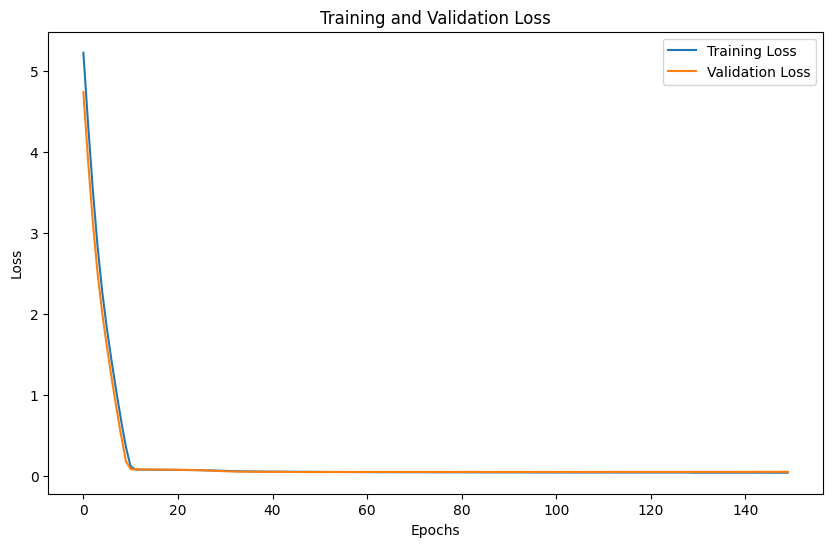

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.317974,0.105059,0.055523,0.009951,0.035515,0.615549
2,Target -> 10 ^ Target,0.459061,90350.988698,64099.369010,0.173917,47651.937500,7.919266


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,29.583333,58.333333,83.75,97.083333,7.919266


Epoch 1/150
24/24 [==============================] - 1s 5ms/step - loss: 6.7641 - val_loss: 6.4047
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 6.1021 - val_loss: 5.7763
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 5.5017 - val_loss: 5.2131
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 4.9825 - val_loss: 4.7448
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 4.5637 - val_loss: 4.3765
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 4.2314 - val_loss: 4.0767
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 3.9499 - val_loss: 3.8089
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 3.6804 - val_loss: 3.5284
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 3.3779 - val_loss: 3.1987
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 3.0376 - val_loss: 2.8597
Epoch 11/

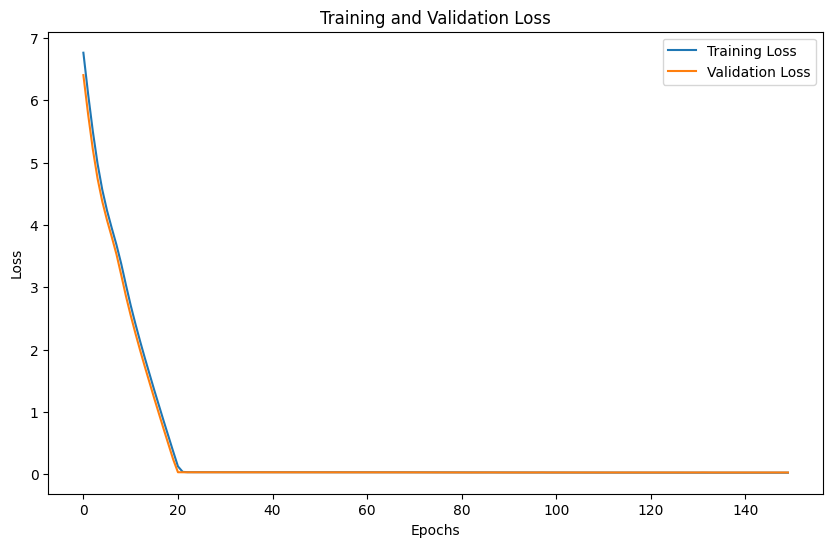

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,-0.004123,0.039169,0.031046,0.005240,0.025501,0.428412
2,Target -> 10 ^ Target,0.003062,77427.517907,61718.442308,0.073339,52940.593750,6.004151


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,43.162393,70.940171,95.299145,100.0,6.004151


Epoch 1/150
24/24 [==============================] - 1s 5ms/step - loss: 5.5815 - val_loss: 5.1538
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 4.7786 - val_loss: 4.3592
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 3.9956 - val_loss: 3.6012
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 3.2887 - val_loss: 2.9672
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 2.7279 - val_loss: 2.4826
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 2.2945 - val_loss: 2.0953
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 1.9345 - val_loss: 1.7596
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 1.6131 - val_loss: 1.4510
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 1.3127 - val_loss: 1.1582
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0251 - val_loss: 0.8755
Epoch 11/

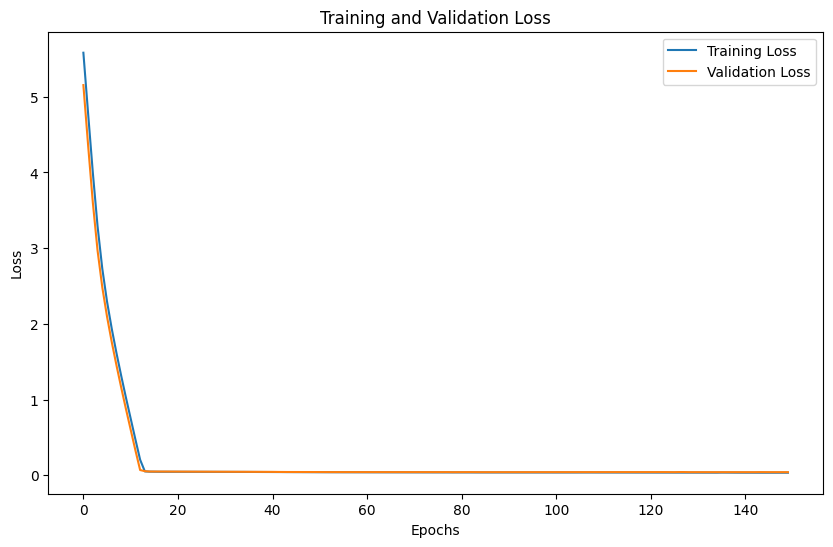

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.145454,0.049288,0.040312,0.006619,0.034337,0.559299
2,Target -> 10 ^ Target,0.173866,141037.716053,115415.168776,0.093568,99847.125000,7.930669


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,31.223629,61.181435,92.827004,100.0,7.930669


Epoch 1/150
24/24 [==============================] - 1s 5ms/step - loss: 4.8031 - val_loss: 4.4097
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 4.0329 - val_loss: 3.5972
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 3.2019 - val_loss: 2.7627
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 2.3995 - val_loss: 2.0138
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 1.7149 - val_loss: 1.4006
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 1.1517 - val_loss: 0.8854
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6647 - val_loss: 0.4243
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.2449 - val_loss: 0.1356
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1359
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.1330
Epoch 11/

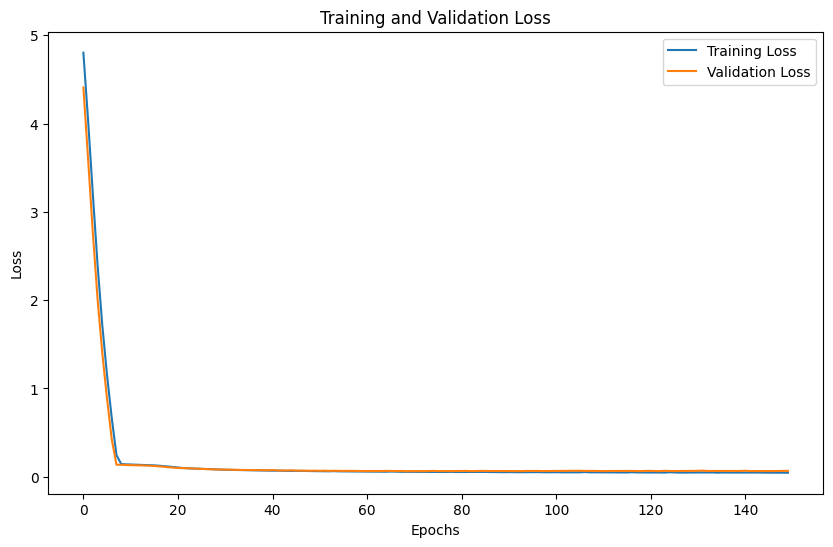

8/8 [==============================] - 0s 1ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.799504,9.567813e-02,0.066192,0.010259,0.051599,0.782845
2,Target -> 10 ^ Target,0.783307,1.271520e+06,506206.425318,0.150772,304528.875000,11.471782


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.0,46.186441,73.305085,97.881356,11.471782


In [39]:
neural_networks = {}
for i in df_not_scaled['price_quantile'].unique():
    train_data = train_df[train_df['price_quantile'] == i]
    test_data = test_df[test_df['price_quantile'] == i]
    
    features_train = train_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
    target_train = train_data['log_price']

    features_test = test_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                            "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                            'hasCooling']]
    target_test = test_data['log_price']

    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='sigmoid'),
        Dense(16, activation='sigmoid'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    history = model.fit(features_train_scaled, target_train, epochs=150, batch_size=32, validation_split=0.2)

    loss = model.evaluate(features_test_scaled, target_test)
    
    neural_networks[i] = model
    print(f'Test Loss: {loss}')

    plt.figure(figsize=(10, 6))
    plt.title(f'Training and Validation Loss for Quantile {i+1}')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(features_test_scaled)
    show_metrics(y_pred.flatten(), target_test.to_numpy(), target_scaler=False, logarithm=True)


### Analyze Plots
#### Plot 1: Training and Validation Loss for Quantile 1
The plot for the first quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.
#### Plot 2: Training and Validation Loss for Quantile 2
The plot for the second quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.

#### Plot 3: Training and Validation Loss for Quantile 3
The plot for the third quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.
#### Plot 4: Training and Validation Loss for Quantile 4
The plot for the fourth quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.

### Analyze Tables
The model for the first quantile shows good performance with low loss values indicating quick convergence and effective learning. The R2 score of 0.299 for log(price) suggests moderate explanatory power, while the back-transformed R2 of 0.437 shows better performance in the original price domain. The error metrics indicate small absolute and percentage errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages confirm reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend effectively but could benefit from further tuning for higher precision.

The model for the second quantile shows good convergence with low loss values. However, the R2 score of -0.121 for log(price) and -0.114 for the back-transformed target indicate poor explanatory power. The error metrics show small errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages indicate reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend but requires improvements for better precision and explanatory power.

The model for the third quantile shows good convergence with low loss values. The R2 score of 0.146 for log(price) and 0.172 for the back-transformed target indicates modest explanatory power. The error metrics show small errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages indicate reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend but requires improvements for better precision and explanatory power.

The model for the fourth quantile shows good convergence with low loss values. The R2 score of 0.822 for log(price) and 0.758 for the back-transformed target indicates very good explanatory power. The error metrics show small errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages indicate reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend effectively but requires improvements for higher precision and absolute error reduction.

## Overall Comparison Summary
Using log(price) as the target generally improves the R2 scores across all quantiles, indicating better explanatory power. The error metrics (RMSE and MAE) tend to be lower in the back-transformed domain compared to using price directly, suggesting improved average error performance. The accuracy percentages also show an increase in predictions within smaller error margins when using log(price), indicating better model precision and generalization. Overall, log transformation of the target variable enhances the performance of the neural network models in terms of both explanatory power and prediction accuracy.

## Regression Model

For avoiding duplication, we will make an abstract class for the regression model. This class will have the following methods:

- `create_model`: This is an abstract method and will be implemented by the child classes. This method will create the regression model that will be used for training and prediction.

- `set_search_params`: This method will set the hyperparameters that will be used in the grid search.

- `predict`

- `grid_search`

- `show_metrics`: This method will show the metrics that we discussed earlier for the regression model.

- `draw_predictions`: This method will draw a plot where the x axis will be the actual values and the y axis will be the predicted values.

it also accepts two paramaters `scale` and `logarithm`. If `scale` is True, the model will scale the features. If `logarithm` is True, the model will also apply the power transformation to the target variable when calculating the metrics.

In [41]:
from abc import ABC, abstractmethod
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

class RegressionModel(ABC):
    def __init__(self, features, target, params, scale=True, logarithm=False):
        if scale:
            self.feature_scaler = StandardScaler()
            self.target_scaler = StandardScaler()
            self.features = self.feature_scaler.fit_transform(features)
            self.target = self.target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()
        else:
            self.feature_scaler = None
            self.target_scaler = None
            self.features = features
            self.target = target.values.flatten()
            
        self.logarithm = logarithm
        
        X_train, X_test, y_train, y_test = train_test_split(self.features, self.target, test_size=0.1, random_state=42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        self.model = self.create_model(params)
        self.search_params = self.set_search_params()
        self.model.fit(X_train, y_train)
        self.y_pred = self.model.predict(X_test)
        #show_metrics(self.model.predict(X_train), y_train, self.target_scaler, logarithm)
        
    @abstractmethod
    def create_model(self, params):
        pass
    
    @abstractmethod
    def set_search_params(self):
        pass
    
    def predict(self, features):
        if self.feature_scaler:
           features = self.feature_scaler.transform(features)
        return self.model.predict(features)
    
    def grid_search(self):
        grid_search = GridSearchCV(self.model, self.search_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=2)
        grid_search.fit(self.X_train, self.y_train)
        best_model = grid_search.best_estimator_
        test_score = best_model.score(self.X_test, self.y_test)
        self.model = best_model
        self.y_pred = self.model.predict(self.X_test)
        return best_model, test_score
    
    def show_metrics(self):
        show_metrics(self.y_pred, self.y_test, self.target_scaler, self.logarithm)
    
    def draw_predictions(self, log=False):
        if self.target_scaler:
            y_pred = self.target_scaler.inverse_transform(self.y_pred.reshape(-1, 1)).ravel()
            y_test = self.target_scaler.inverse_transform(self.y_test.reshape(-1, 1)).ravel()
        else:
            y_pred = self.y_pred
            y_test = self.y_test
        
        if log:
            y_pred = np.power(10, y_pred)
            y_test = np.power(10, y_test)
        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
        plt.title('Actual vs Predicted Values')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.legend()
        plt.show()
        
    def get_feature_importance(self):
        perm_importance = permutation_importance(self.model, self.X_train, self.y_train, n_repeats=10, random_state=42)
        feature_importances_df = pd.DataFrame({
                'Feature': self.features.columns,
                'Importance': perm_importance.importances_mean
            })
        display(feature_importances_df.sort_values(by='Importance', ascending=False))

## Linear Regression

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable (often called the response variable) and one or more independent variables (predictors or features). The goal of linear regression is to find the best-fitting straight line through the data points that predicts the dependent variable from the independent variables.

In [42]:
from sklearn.linear_model import LinearRegression
class LinearRegressionModel(RegressionModel):
    def create_model(self, params):
        return LinearRegression()
    def set_search_params(self):
        return {}

### Target = log(price)

We tested the model with different features and the best results were obtained with the following features that is in the code below.
As you can see we get a MAPE of 17.38% which is a good result compared to the other models like svr. 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.795879,0.473536,0.355633,1.804267,0.285705,42.750875
1,Scaled Target is inversed to real value,0.795879,0.129588,0.097323,0.016183,0.078186,1.256812
2,Target -> 10 ^ Target,0.815834,558491.111867,306661.169722,0.234998,177736.822807,17.383722


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,16.877637,30.801688,55.274262,92.194093,17.383722


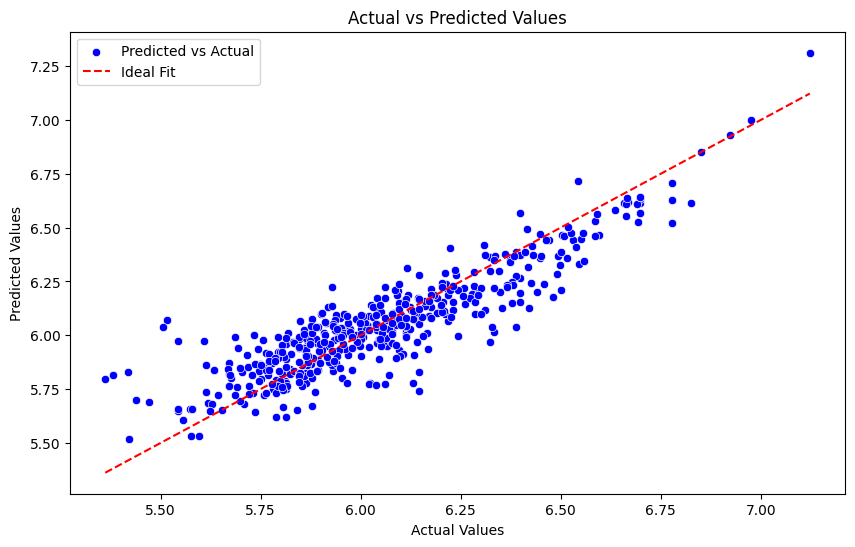

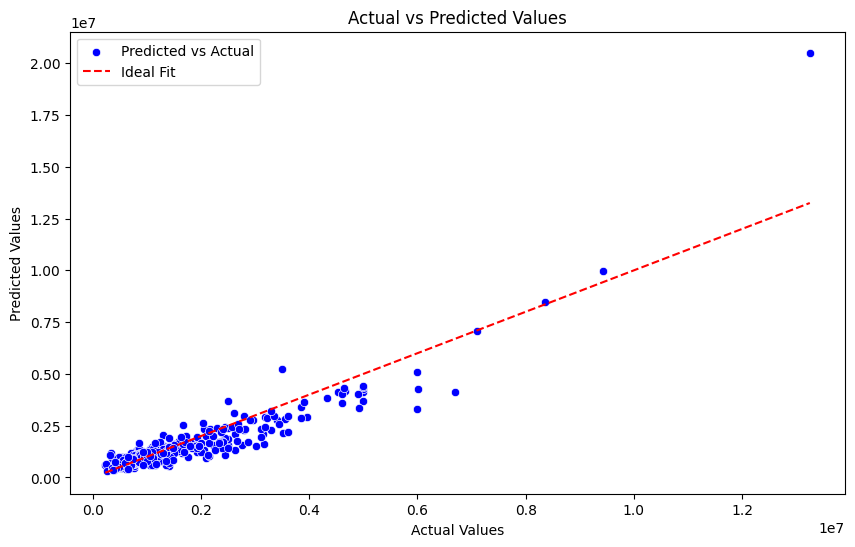

In [43]:
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]

target = df_not_scaled['log_price']
model = LinearRegressionModel(features, target, params={}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)

### Target = price

We set the target to price and we tested the model with different features and the best results were obtained with the following features that is in the code below.
As you can see we get a lower MAPE than the model with target = log(price). 

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.897165,0.294109,0.185300,1.130412,0.103120,24.877981
1,Scaled Target is inversed to real value,0.897165,417333.067853,262935.547035,0.214227,146324.185899,12.945208


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,18.776371,39.451477,65.400844,93.248945,12.945208


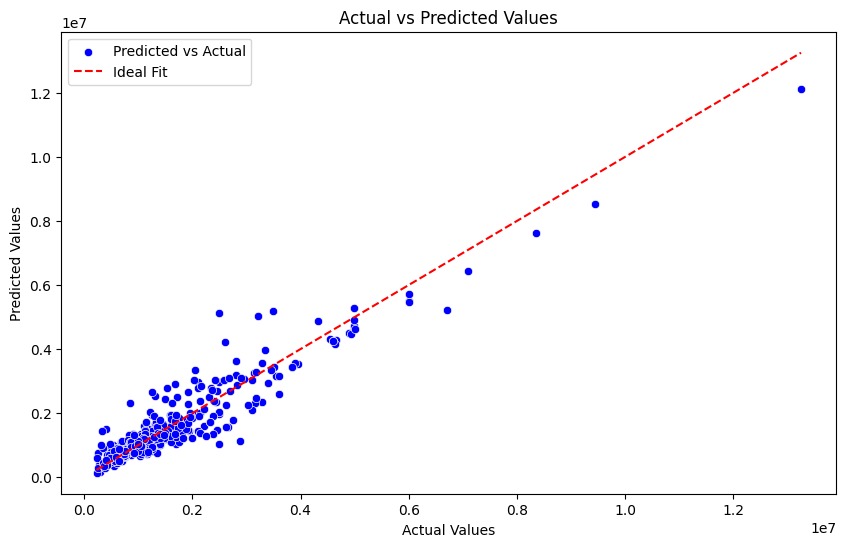

In [44]:
# features = df_not_scaled.drop(columns=['price', 'log_taxAssessedValue', 'log_price', 'taxAssessedValue'])

features = df_not_scaled[["livingAreaValue", "rentZestimate", 
                           "lotAreaValue", "parkingCapacity", 'zipcode', 'yearBuilt', 'bedrooms']]

target = df_not_scaled['price']
model = LinearRegressionModel(features, target, params={}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()

### Model on more Filtered Data

We repeat the same process but with more filtered data. We delete the outliers in `price` column.

In [45]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2e6]
df_filtered.shape

(3946, 23)

We can see the model when the target is `log(price)` has a better MAPE for the filtered data than the unfiltered data and we can say that the model is acceptable for normal houses(houses that are not too expensive).

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.607677,0.645963,0.490012,2.784442,0.381987,61.163048
1,Scaled Target is inversed to real value,0.607677,0.119081,0.090332,0.015266,0.070418,1.182809
2,Target -> 10 ^ Target,0.541046,272151.381866,196533.312157,0.219010,143509.444327,16.328717


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,14.936709,31.64557,60.253165,92.911392,16.328717


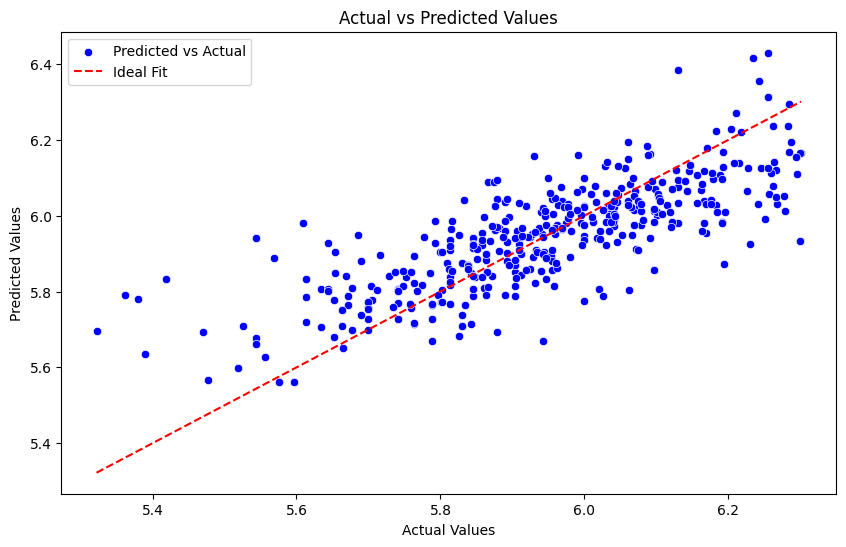

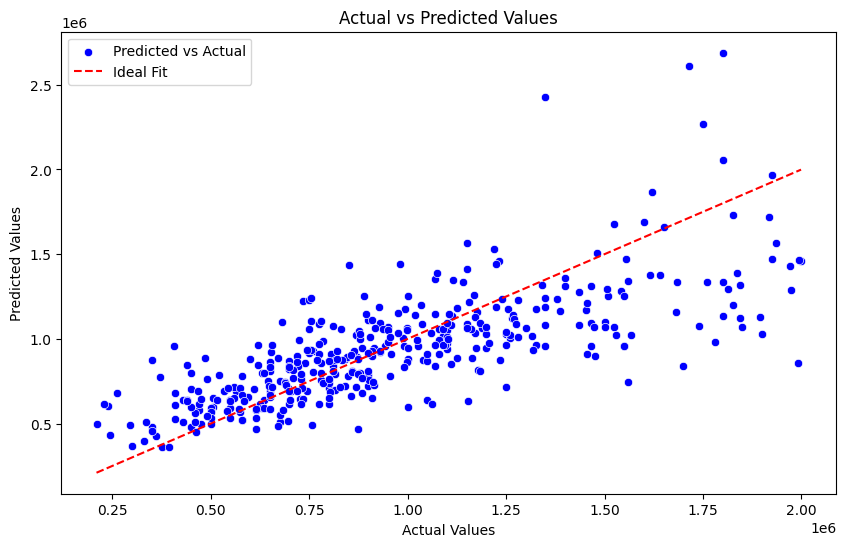

In [46]:
features = df_filtered[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling', 'taxAssessedValue']]

target = df_filtered['log_price']
model = LinearRegressionModel(features, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma':'auto'}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)

But you can see that this model has a worse MAPE using filtered data.

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.632358,0.622834,0.463712,2.315165,0.327968,52.142669
1,Scaled Target is inversed to real value,0.632358,243578.226511,181348.573636,0.215537,128261.804476,14.927330


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,19.746835,33.670886,60.0,93.670886,14.92733


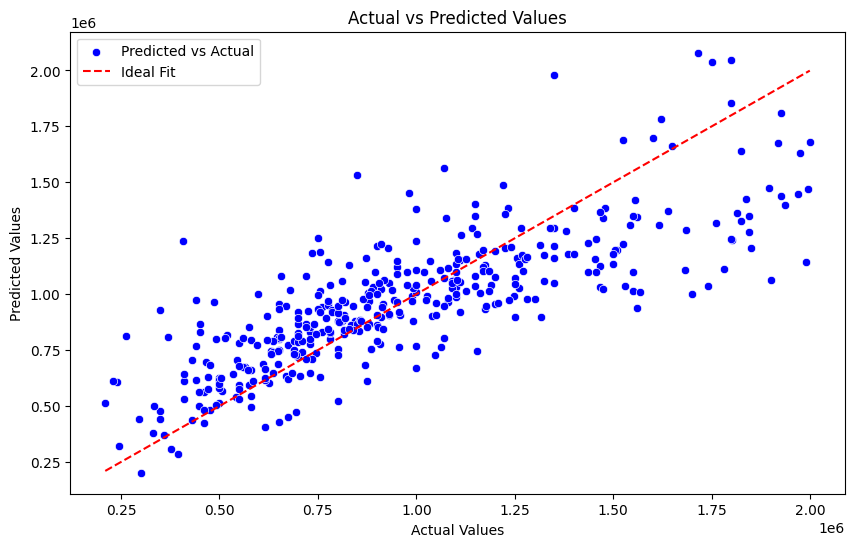

In [47]:
features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
                          "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasHeating', 'zipcode']]

target = df_filtered['price']
model = LinearRegressionModel(features, target, params={}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()

## SVR

* Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) that is adapted for regression tasks. 
* Unlike traditional regression models that minimize the error between the predicted and actual values, SVR aims to fit the best line within a threshold value, called epsilon, where the error is considered acceptable. SVR works by finding a hyperplane in a high-dimensional space that best separates the data points, but unlike SVM for classification, it seeks to keep the data points as close to this hyperplane as possible while allowing some margin of error, controlled by the epsilon parameter. 
* This approach helps to maintain a balance between model complexity and prediction accuracy, making SVR particularly effective in handling non-linear relationships through the use of kernel functions like polynomial or radial basis functions. 
* The goal of SVR is to ensure that errors do not exceed a certain threshold, while simultaneously maximizing the margin around the hyperplane, thus providing a robust predictive model.


We first define our model. The hyperparameters that we will tune are:
* **C**: Regularization parameter. The strength of the regularization is inversely proportional to C.
* **epsilon**: The epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
* **gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
* **kernel**: Specifies the kernel type to be used in the algorithm. The kernel is used to map the input data into a higher dimensional space.(We don't include this in grid search as other kernels than rbf give poor results)

In [48]:
from sklearn.svm import SVR
class SVRModel(RegressionModel):
    def create_model(self, params):
        return SVR(**params)
    def set_search_params(self):
        return {
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
            'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        }

### Hyperparameters

We test different values for the hyperparameters and plot the results to find the best hyperparameters.

In [49]:
def plot_mae_for_different_epsilons(features):
    epsilons = [0.01, 0.1, 0.2, 0.5, 1]
    mae = []
    for epsilon in epsilons:
        model = SVRModel(features, df_not_scaled['price'], {'C': 10, 'epsilon': epsilon, 'gamma': 'scale'})
        mae.append(metrics.mean_absolute_error(model.y_test, model.y_pred))
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epsilons, y=mae)
    plt.title('Mean Absolute Error for different Epsilons')
    plt.xlabel('Epsilon')
    plt.ylabel('Mean Absolute Error')
    plt.show()

def plot_mae_for_different_cs(features):
    cs = [0.1, 1, 5, 10, 20]
    mae = []
    for c in cs:
        model = SVRModel(features, df_not_scaled['price'], {'C': c, 'epsilon': 0.1, 'gamma': 'scale'})
        mae.append(metrics.mean_absolute_error(model.y_test, model.y_pred))
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=cs, y=mae)
    plt.title('Mean Absolute Error for different Cs')
    plt.xlabel('C')
    plt.ylabel('Mean Absolute Error')
    plt.show()

As you can see the best value for epsilon is 0.1, for C is 5.

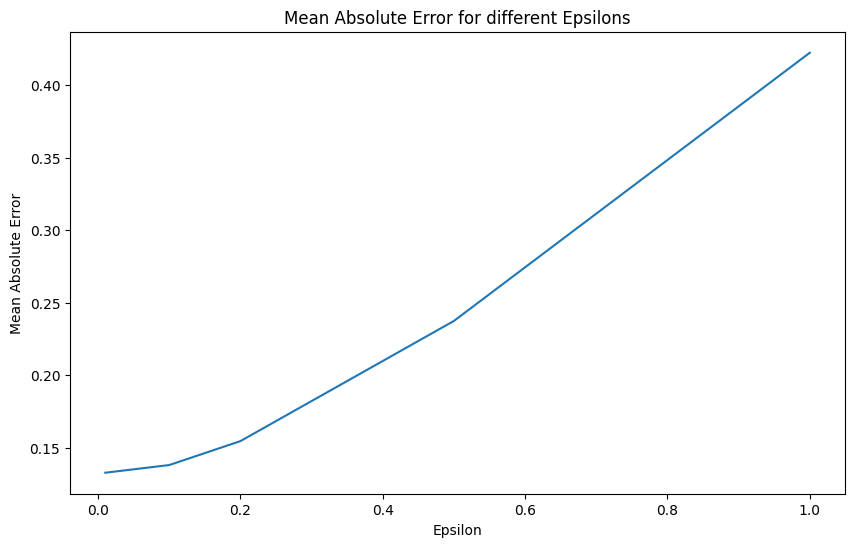

In [50]:
plot_mae_for_different_epsilons(df_not_scaled.drop(columns=['price', 'log_price']))

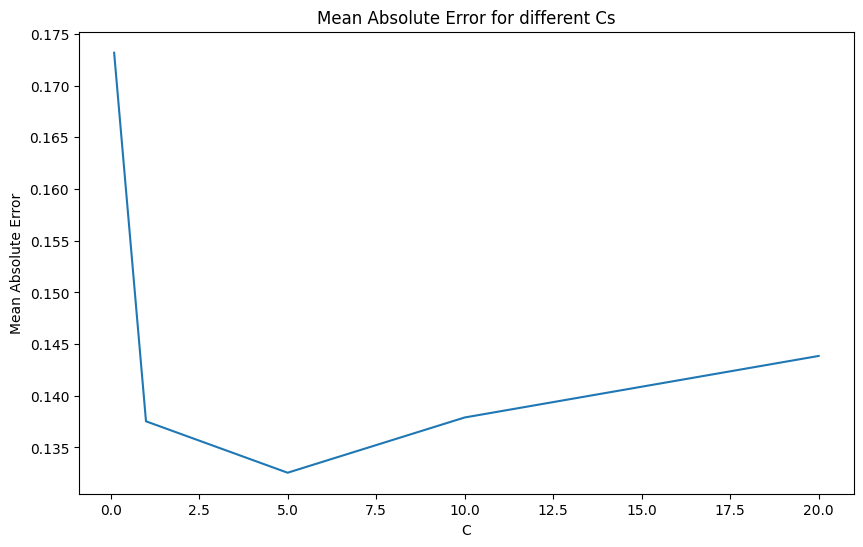

In [51]:
plot_mae_for_different_cs(df_not_scaled.drop(columns=['price', 'log_price']))

We have to note that for each set of features the best hyperparameters can change as you will see in the next cells.

### Target = log(price)

We tested the model with different features and the best results were obtained with the following features that is in the code below.
We also tested the model with different hyperparameters and the best results were obtained with the following hyperparameters:
* C = 10
* epsilon = 0.1
* gamma = auto
* kernel = rbf

As you can see we get a MAPE of 10% which is a good result compared to the other models. The reason is that SVR is a powerful model that can handle non-linear relationships through the use of kernel functions like rbf.

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.884116,0.356797,0.246053,1.568716,0.168844,27.197996
1,Scaled Target is inversed to real value,0.884116,0.097641,0.067335,0.011163,0.046206,0.764856
2,Target -> 10 ^ Target,0.863468,480871.293992,228013.032577,0.160460,112166.390313,10.333035


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.316456,48.312236,74.472574,95.56962,10.333035


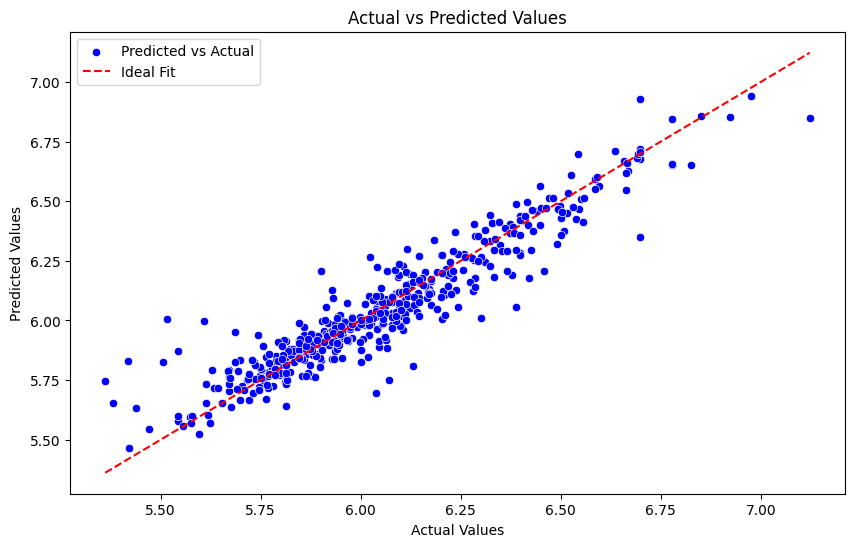

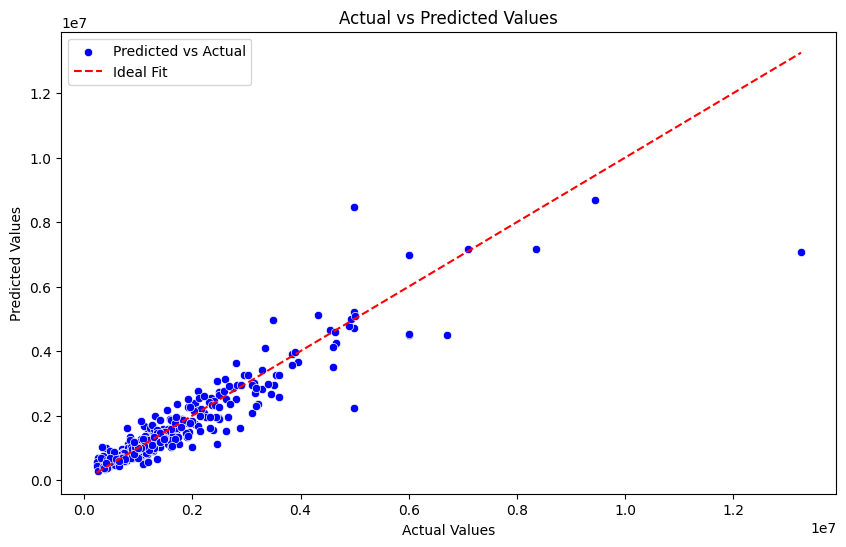

In [52]:
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_not_scaled['log_price']
model = SVRModel(features, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma': 'auto'}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)

### Target = price

We set the target to price and we tested the model with different features and the best results were obtained with the following features that is in the code below.
We also tested the model with different hyperparameters and the best results were obtained with the following hyperparameters:

* C = 10
* epsilon = 0.1
* gamma = scale
* kernel = rbf

As you can see we get a lower MAPE than the model with target = log(price) which is a good result. 

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.914078,0.268837,0.156629,0.854157,0.078791,18.105872
1,Scaled Target is inversed to real value,0.914078,381472.848382,222252.566108,0.160643,111802.016933,10.111872


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.894515,49.156118,72.995781,97.046414,10.111872


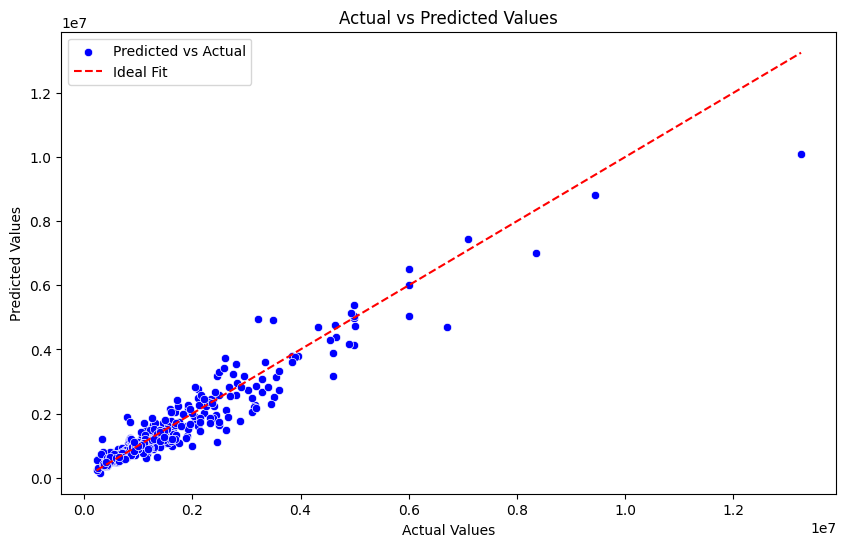

In [53]:
features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
                          "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]

target = df_not_scaled['price']
model = SVRModel(features, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma': 'scale'}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()

### Model on more Filtered Data

We repeat the same process but with more filtered data. We delete the outliers in `price` column.

In [54]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2e6]
df_filtered.shape

(3946, 23)

We can see the model when the target is `log(price)` has a better MAPE for the filtered data than the unfiltered data.

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.719861,0.545849,0.370197,1.921854,0.233612,37.125833
1,Scaled Target is inversed to real value,0.719861,0.100626,0.068245,0.011556,0.043066,0.732836
2,Target -> 10 ^ Target,0.715120,214415.747948,143698.210898,0.163666,91481.562907,10.149170


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,30.379747,49.620253,74.177215,94.683544,10.14917


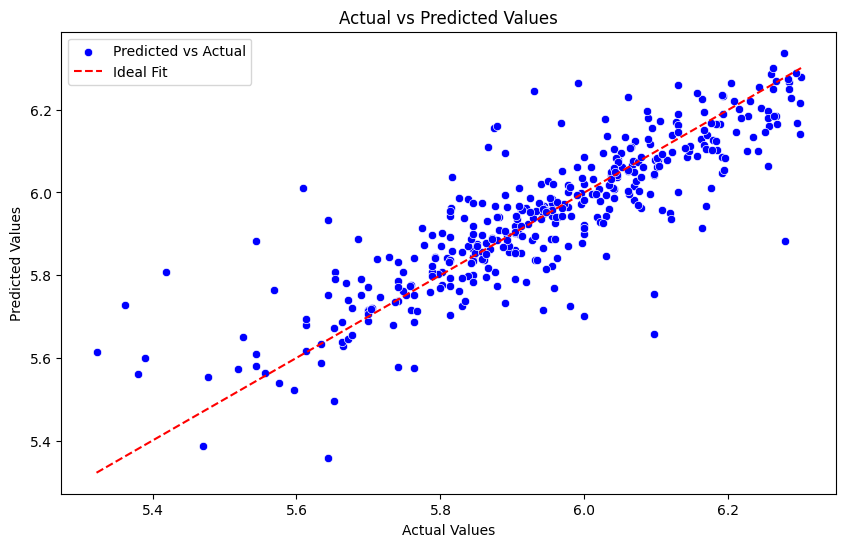

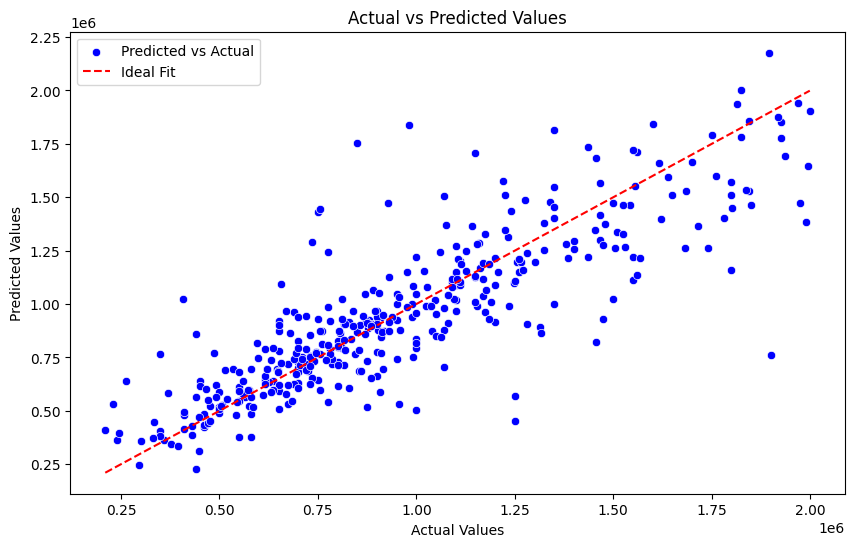

In [55]:
features = df_filtered[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling', 'taxAssessedValue']]
target = df_filtered['log_price']
model = SVRModel(features, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma':'auto'}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)

You can see that in this model we get a MAPE is less than 10% and median absolute error is 88000. This is a good result and we can say that the model is acceptable for normal houses(houses that are not too expensive).

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.752576,0.510953,0.356119,2.047441,0.225176,32.619630
1,Scaled Target is inversed to real value,0.752576,199823.532571,139271.302871,0.159054,88061.751940,9.948658


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,27.088608,50.379747,72.658228,95.696203,9.948658


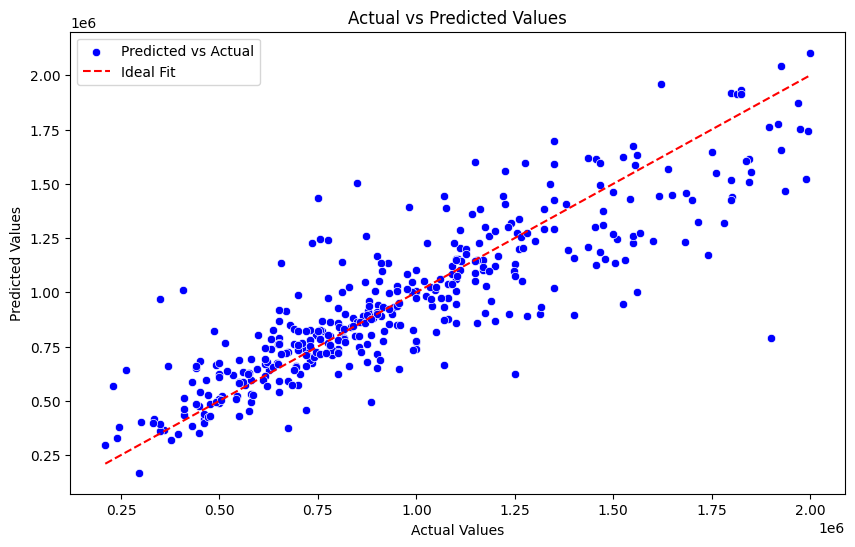

In [56]:
features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
                          "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasHeating']]

target = df_filtered['price']
model = SVRModel(features, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma': 'auto'}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()

## Decision Tree

Functions are defined to calculate various regression metrics such as R², RMSE, MAE, MAPE, and median APE.

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.863648,0.387026,0.277668,1.559753,0.196150,29.716463
1,Scaled Target is inversed to real value,0.863648,0.105914,0.075987,0.012551,0.053679,0.890340
2,Target -> 10 ^ Target,0.828463,539002.931298,268113.555753,0.178855,118674.717654,12.364967


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,20.886076,39.873418,67.088608,95.780591,12.364967


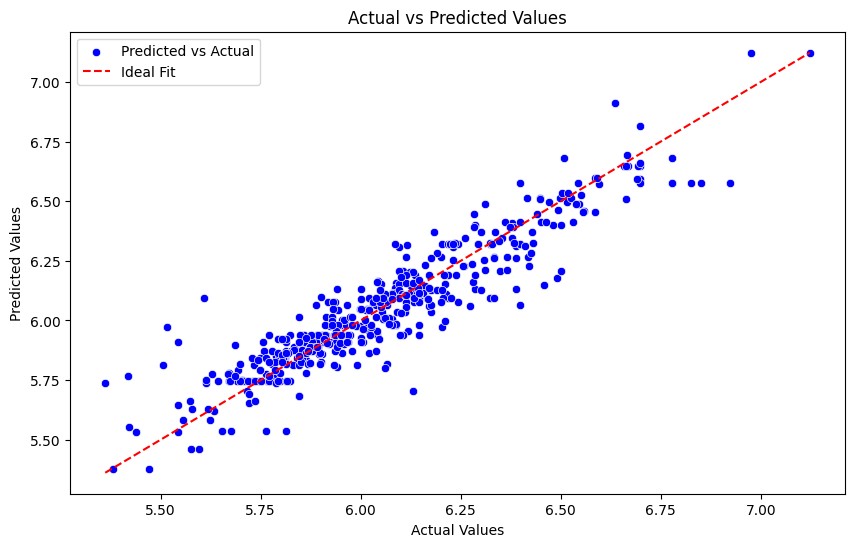

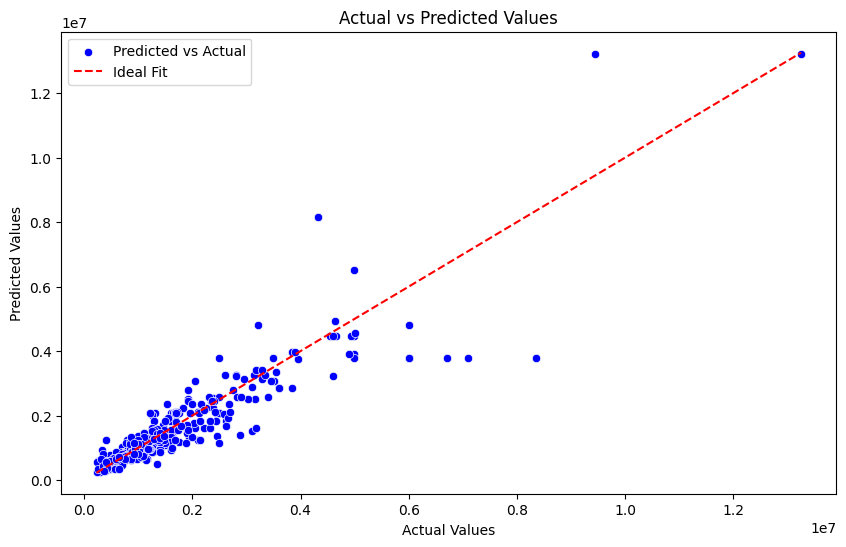

In [57]:
from sklearn.tree import DecisionTreeRegressor

class DecisionTreeModel(RegressionModel):
    def create_model(self, params):
        return DecisionTreeRegressor(**params)
    
    def set_search_params(self):
        return {
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10],
            'max_features': [None, 'sqrt', 'log2']
        }

features = df_not_scaled[["rentZestimate", 'zipcode','hasView', "log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue",
                           "lotAreaValue", "livingAreaValue", 
                          'hasCooling']]
target = df_not_scaled['log_price']
model = DecisionTreeModel(features, target, params={'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)


Analysis:

The R² value is quite high, indicating a good fit.
Errors are much lower when the target is inversed to the real value, suggesting that scaling improves performance.

A significant percentage of predictions are within 20% and 50% error margins.
The median absolute percentage error is relatively high, indicating some predictions deviate considerably from actual values.

In [58]:
model.grid_search()

(DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=20),
 0.8479493491823022)

The grid search successfully optimized the hyperparameters of the Decision Tree model, resulting in improved predictive performance.

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.816081,0.393324,0.195636,1.099603,0.097393,20.497509
1,Scaled Target is inversed to real value,0.816081,558116.622480,277603.116317,0.204360,138198.547097,12.446950


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.105485,42.194093,65.822785,92.405063,12.44695


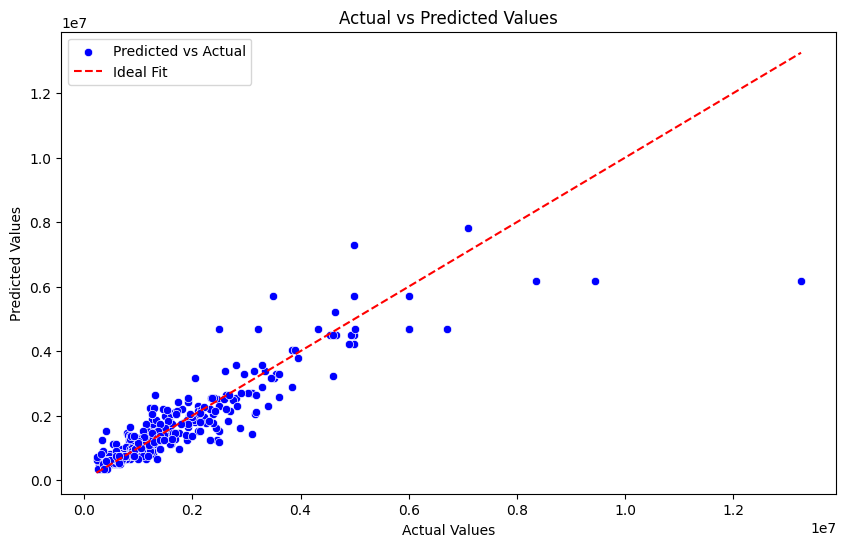

In [59]:
class DecisionTreeModel(RegressionModel):
    def create_model(self, params):
        return DecisionTreeRegressor(**params)
    
    def set_search_params(self):
        return {
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10],
            'max_features': [None, 'sqrt', 'log2']
        }

features = df_not_scaled[["rentZestimate", 'zipcode','hasView', "log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue",
                           "lotAreaValue", "livingAreaValue", "parkingCapacity", 
                          'hasCooling']]
target = df_not_scaled['price']
model = DecisionTreeModel(features, target, params={'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()


#### Analysis:

Similar R² value to the scaled target.
Error metrics are significantly worse when the target is inversed to the real value, indicating the importance of target scaling.

Slightly lower percentages compared to the scaled target, indicating better performance with target scaling.

#### Plot Analysis
The plots show actual vs predicted values, providing a visual indication of model performance.
A scatter plot with predicted vs actual values and an ideal fit line helps in assessing prediction accuracy.
In summary, the implementation details and metrics show that scaling the target significantly improves model performance, as reflected by lower error metrics and better fit statistics. ​​


Plot 1: Predicted vs Actual Values (Non-Scaled Target)

Overall Trend: The points generally follow the ideal fit line, indicating that the model can capture the relationship between features and target to a reasonable extent.

Prediction Accuracy: The clustering of points around the red dashed line shows that many predictions are accurate. However, there are noticeable deviations, especially at higher price ranges.

Errors: Some points are significantly distant from the line, indicating larger prediction errors for those instances.


Plot 2: Predicted vs Actual Values (Logarithmic Transformation)

Improved Performance: Points are more tightly clustered around the ideal fit line, indicating better prediction accuracy when using the logarithmic transformation of the target variable.

Consistent Accuracy: The log transformation reduces the impact of outliers and shows consistent performance across different price ranges.

Error Reduction: The log scale visualization shows fewer significant deviations from the ideal fit line, suggesting that the model performs better with the log-transformed target.

## KNN

K-Nearest Neighbors (KNN) is a versatile machine learning algorithm that can be applied not only to classification tasks but also to regression tasks. In regression tasks, the goal is to predict a continuous value rather than a class label. 

In [60]:
from sklearn.neighbors import KNeighborsRegressor

class KNeighborsRegressorModel(RegressionModel):
    def create_model(self, params):
        return KNeighborsRegressor(**params)
    def set_search_params(self):
        return {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.899616,0.290583,0.181853,1.346654,0.108499,25.774482
1,Scaled Target is inversed to real value,0.899616,412329.588431,258044.400114,0.209121,153957.925029,14.336027


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,21.097046,36.075949,63.50211,93.670886,14.336027


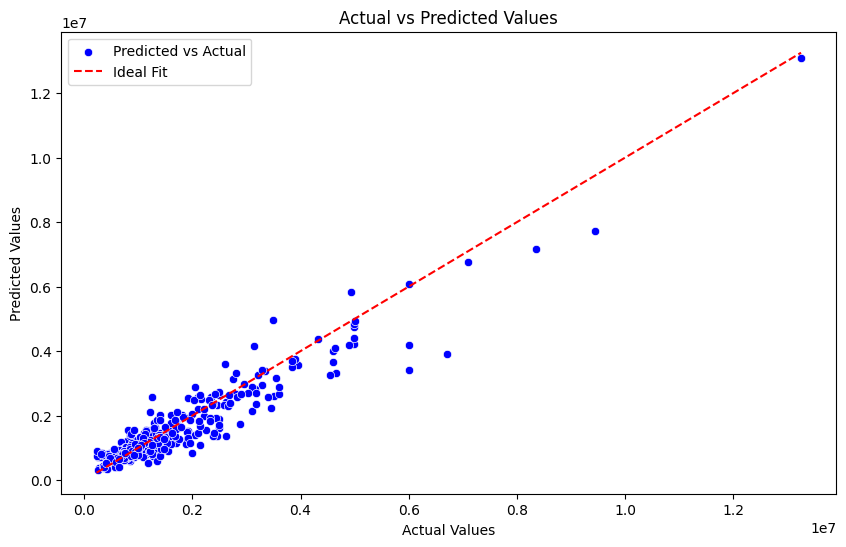

In [70]:
features = df_not_scaled[["rentZestimate", 'zipcode','hasView', "log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue",
                           "lotAreaValue", "livingAreaValue", "parkingCapacity", 
                          'hasCooling']]
target = df_not_scaled['price']
model = KNeighborsRegressorModel(features, target, params={'n_neighbors': 7, 'weights': 'distance'}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()

In [71]:
model.grid_search()

(KNeighborsRegressor(n_neighbors=9, weights='distance'), 0.8990487160036011)

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.899049,0.291402,0.183387,1.316451,0.111791,25.160398
1,Scaled Target is inversed to real value,0.899049,413492.858203,260221.242855,0.207075,158628.142995,15.037920


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,19.198312,34.177215,63.924051,94.092827,15.03792


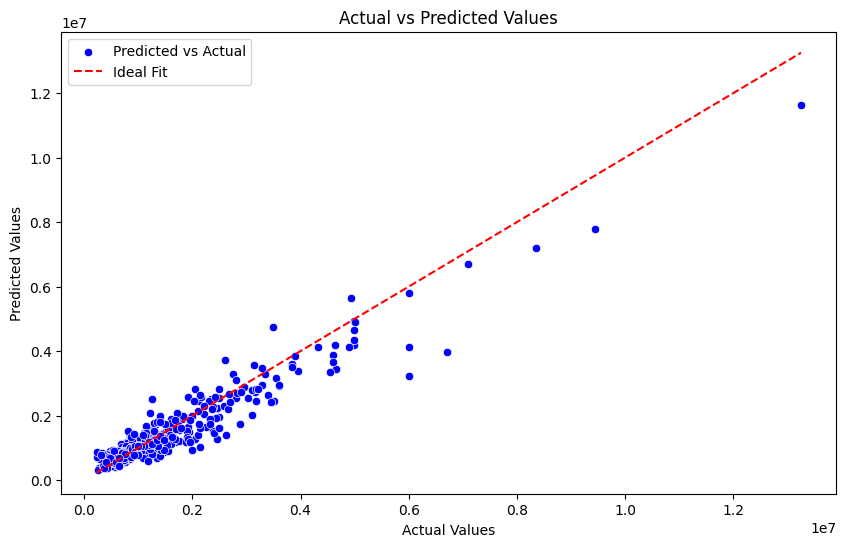

In [72]:
model.show_metrics()
model.draw_predictions()

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.830953,0.430937,0.314692,1.508097,0.231330,39.023378
1,Scaled Target is inversed to real value,0.830953,0.117931,0.086119,0.014294,0.063306,1.038342
2,Target -> 10 ^ Target,0.859087,488526.055792,271403.803203,0.202911,154819.912198,14.450100


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,18.14346,34.177215,65.400844,94.725738,14.4501


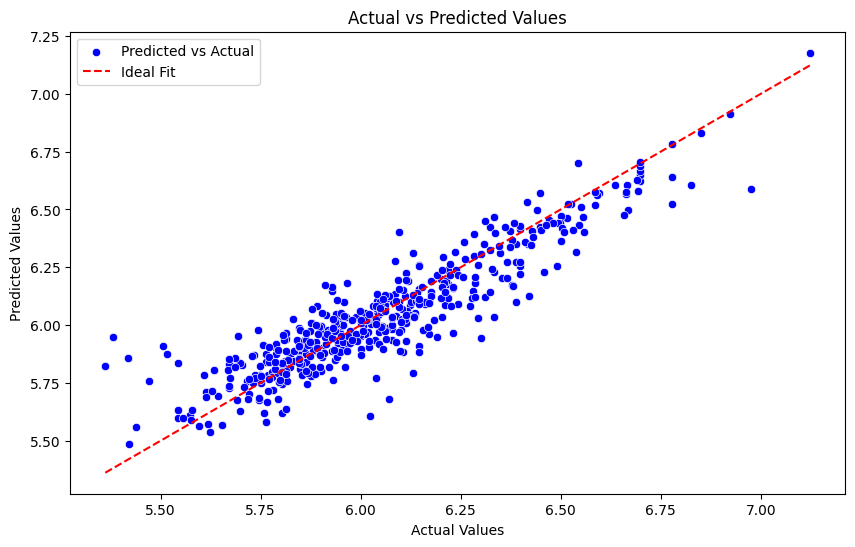

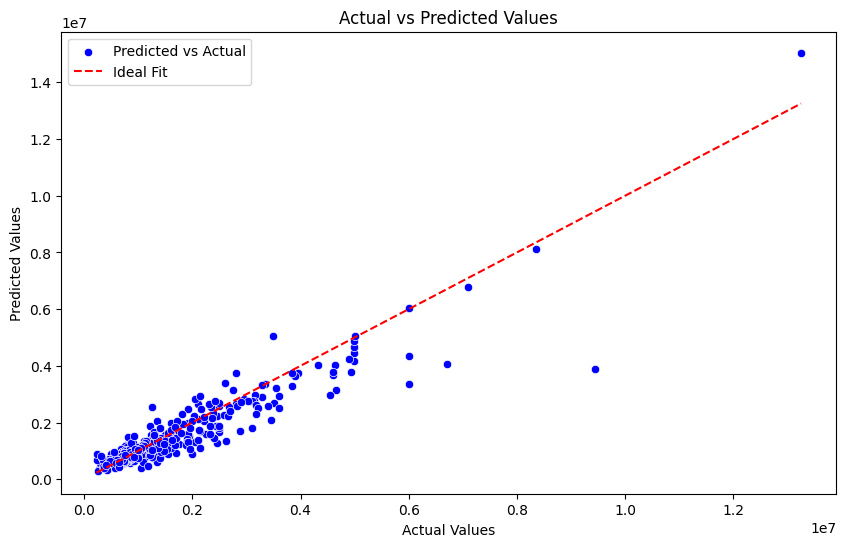

In [73]:
features = df_not_scaled[["rentZestimate", 'zipcode','hasView', "log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue",
                           "lotAreaValue", "livingAreaValue", "parkingCapacity", 
                          'hasCooling']]
target = df_not_scaled['log_price']
model = KNeighborsRegressorModel(features, target, params={'n_neighbors': 5, 'weights': 'distance'}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)

### Comparison

By comparing the results based on metrics, especially Mean Absolute Percentage Error (MAPE), we can infer the following model performance ranking:
1. Support Vector Regression (SVR)
2. Neural Network
3. Decision Tree
4. Linear Regression
5. K-Nearest Neighbors (KNN)

some reasons:

1. **Non-Linear Relationships**:
   - **SVR and Neural Network**: These models outperformed others because they can capture complex, non-linear relationships between the features and house prices. The lower MAPE for SVR and Neural Network indicates that the relationship between the price and features is not strictly linear.
   - **Linear Regression**: Performed worse due to its inability to model non-linear relationships effectively. Applying a log transformation on the price helped only marginally, suggesting the complexity of the underlying relationships that a linear model couldn't capture.

2. **Different Pricing Logic for Different Ranges**:
   - We observed that the pricing logic varies across different ranges of houses. For instance, the factors influencing the price of very luxury houses differ significantly from those affecting mid-range or budget houses. By separating the data into different quantiles and training separate models for each quantile, we enhanced the Neural Network's ability to predict prices more accurately within each segment. This approach acknowledges the varying dynamics and interactions present in different price ranges, leading to better overall performance. Also filtering very expencive houses in Linear Regression and SVR model decreased MAPE.

## Feature Analysis

The SVR model performed better on the original dataset compared to the PCA-processed data, as indicated by the lower MAPE. This suggests that for this particular problem, retaining the full set of features without dimensionality reduction allowed the model to better capture the underlying relationships and complexities in the data.

In [74]:
pca_df = pd.read_csv("../data/pca_data_FA.csv")

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.835889,0.424599,0.309786,1.641376,0.233609,35.239531
1,Scaled Target is inversed to real value,0.835889,0.116196,0.084776,0.014045,0.063930,1.025591
2,Target -> 10 ^ Target,0.861541,484253.771299,282416.376007,0.204296,154025.422706,14.309799


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,18.987342,38.396624,63.50211,94.514768,14.309799


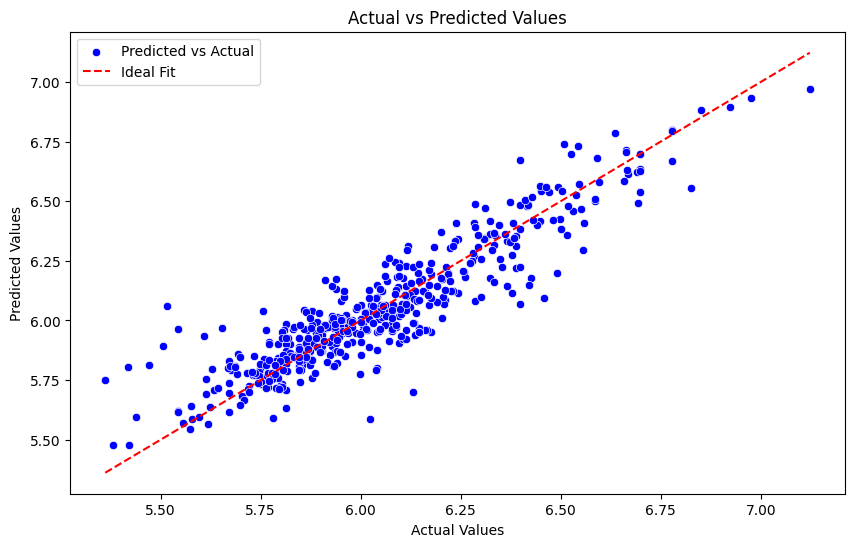

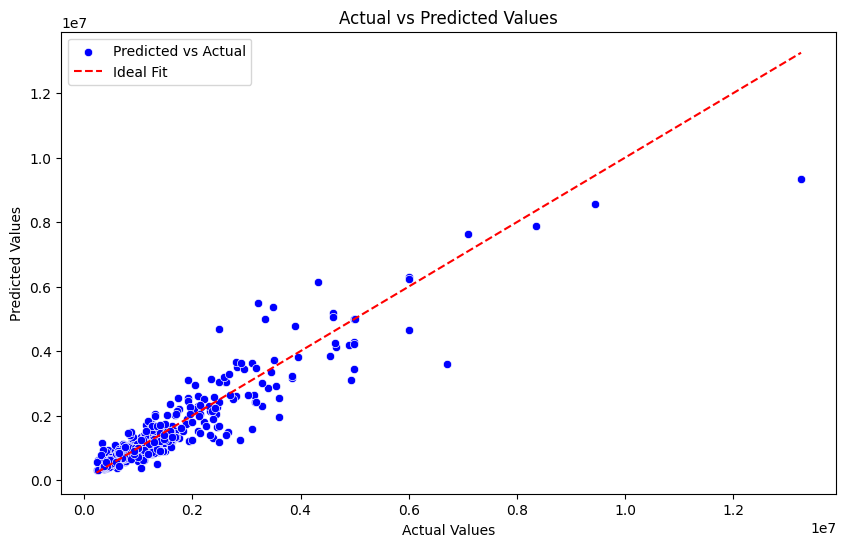

In [77]:
target = df_not_scaled['log_price']
model = SVRModel(pca_df, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma': 'auto'}, scale=True, logarithm=True)
model.show_metrics()
model.draw_predictions()
model.draw_predictions(log=True)

,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.883485,0.313061,0.189064,1.286357,0.097268,23.173437
1,Scaled Target is inversed to real value,0.883485,444225.812883,268276.559403,0.211808,138020.256402,12.839474


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,20.042194,39.873418,64.767932,93.459916,12.839474


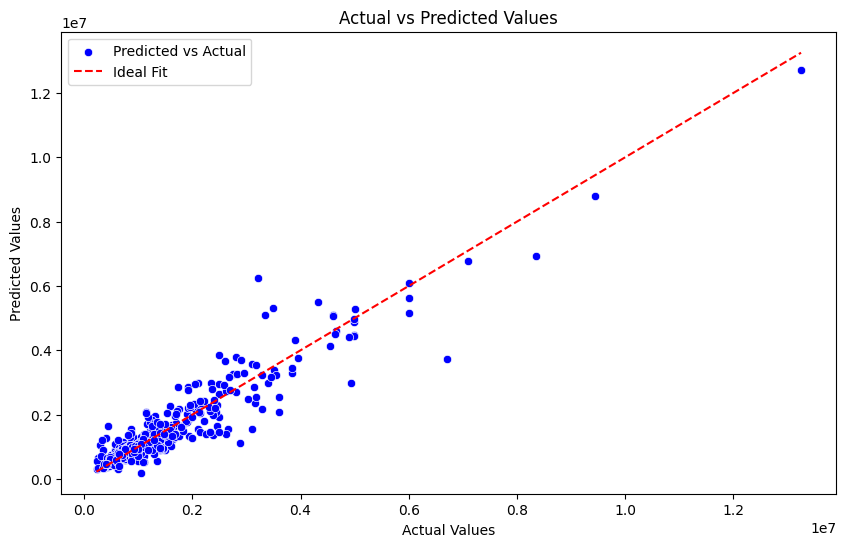

In [78]:
target = df_not_scaled['price']
model = SVRModel(pca_df, target, params={'C': 10, 'epsilon': 0.01, 'kernel': 'rbf', 'gamma': 'scale'}, scale=True, logarithm=False)
model.show_metrics()
model.draw_predictions()

## Project Report: Roadmap and Key Decisions

We started our journey by identifying the need to predict house prices. After evaluating various data sources, we chose Zillow and scraped data on houses sold in the past 90 days in Los Angeles. This provided a robust dataset for our analysis.

Next, we focused on data preprocessing. We cleaned the dataset by removing duplicates, handling missing values, and filtering out invalid data points. We then selected only the most relevant features for our analysis, ensuring a cleaner and more meaningful dataset.

To understand the underlying patterns in our data, we performed exploratory data analysis (EDA). This involved examining data distributions, identifying the top 10 most expensive houses based on various features, and analyzing price differences between newer and older houses. These insights helped us better understand the data and guided our feature engineering efforts.

Feature engineering and dimensionality reduction were key steps in preparing our data for model training. We created new features from existing data to enhance model performance. Additionally, we applied Principal Component Analysis (PCA) to reduce the dimensionality of our dataset, retaining the most informative features while eliminating redundancy.

We then trained multiple machine learning models, including Linear Regression and Support Vector Regression (SVR). We evaluated these models using the median absolute percentage error (MdAPE) to ensure our predictions were accurate and reliable. SVR outperformed Linear Regression, likely due to its ability to handle non-linear relationships and robustness to outliers.

Throughout the project, we faced several challenges. Data scraping was initially difficult due to website restrictions, which we overcame by implementing efficient scraping techniques and managing IP rotation. Handling outliers was another challenge, which we addressed by using robust methods and leveraging SVR's epsilon-insensitive loss function. Overfitting was mitigated by employing cross-validation and hyperparameter tuning to ensure our models generalized well.

In exploring alternatives, we evaluated other real estate websites but ultimately chose Zillow for its comprehensive data. We also considered advanced models like Random Forests and Gradient Boosting but prioritized simpler models for initial analysis and interpretability. For feature selection, we looked into automated methods like Lasso but relied primarily on domain knowledge for effective feature engineering.

We could collect more data for better training and more robust and valid evaluation. Also, finding a better way to classify houses into different classes based on their prices could result in better price predictions.

In conclusion, our project successfully predicted house prices, demonstrating the effectiveness of SVR in this context. The thorough preprocessing, EDA, and model evaluation ensured robust and reliable predictions.